# Background and Motivation:
- Cricket is a beloved sport that is regarded as the second most popular sport in the world. More than 2.5 billion fans worldwide engage in it. This sport is most popular in England, Australia, and subcontinental Asia (especially in India, Pakistan and Bangladesh).
- Being Indians, we definitely have a penchant for cricket that has been entrenched in us since our childhood.
- The game has evolved over the years in formats and T20 is the most popular format in recent times.
- The seeds of T20 were laid in 2008 and IPL plays a major role in making the format popular all over the world.
- There are many factors (controllable and uncontrollable) that contribute to the result of a cricket match.
- Now a days, each team carries a Cricket Analyst who dissects the Winning Mantra for the team.
- Finding out what elements led to a tournament's success and how these factors changed over time provides is the motivation behind selecting this project.

# Types of Questions we wish to Answer:
- The factors that contributed to team's win in the tournament
- How these factors evolved over the years and the recent factors that contributes to win tournamnet

# Proposal for Data Investigation:
- Read the data from csv in form of DataFrames
- Join two tables by DataFrame join
- Look for the missing values, shape and size of DataFrame, Important columns and Summary of each column
- If its imputable, impute the missing values
- Use only the required columns for analysis to gain on Data Computation
- Truncate DataFrame to the period which we are analyzing
- Aggregate the data on portions wherever required
- Summarize the overall DataFrame and the trucated dataframes to analyze, observe and extract features
- Use correlation for feature extraction
- Use plots wherever required for analysis

# TO DO
- Aggregate runs scored by each team per match & distribution of avg runs team scored per match
- Aggregate total team runs conceeded per match and distribution of avg runs team conceeded per match
- Aggregate total wickets taken by the team and distribution of avg wickets taken per match
- Aggregate total wickets lost by the team and distribution of avg wickets lost per match
- Toss Analysis
- Number of wins for each team per season
- Most successfull team of IPL
- Most valuable player
- Total runs scored across seasons.
- Toss Decision across seasons (bar chart)
- Matches won as Toss winners (bar chart)
- Toss Decision per Team (field/bat)
- Hard-hitting Ability – Hard hitters in a team (time range filtering for past 3 years)
- Player consistency-Batsman
- Wicket taking ability
- Strike Rate
- Bowler economy
- Bowler Consistency
- Overall batsman performance (weighted factor method)-best performing batsman
- Overall bowler performance (weighted factor method)-best performing bowlers
- City which hosted the max number of matches
- Which team played the maximum number of IPL Matches so far?
- Matches Won - Batting First vs Bowling First (pie chart)
- Probability of winning based on toss decision


In [1]:
import numpy as np
import pandas as pd
import pylab
import seaborn as sns
sns.set(style="darkgrid")
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
ipl_ball_df=pd.read_csv("ball_by_ball.csv")

In [4]:
ipl_match_df=pd.read_csv("matches.csv")

In [6]:
ipl_df=pd.merge(ipl_ball_df,ipl_match_df,on='id')
ipl_df.head(10)

id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   
5  335982       1     7     4  BB McCullum   RT Ponting     Z Khan   
6  335982       1     7     5   RT Ponting  BB McCullum     Z Khan   
7  335982       1     7     6  BB McCullum   RT Ponting     Z Khan   
8  335982       1     8     1  BB McCullum   RT Ponting  JH Kallis   
9  335982       1     8     2  BB McCullum   RT Ponting  JH Kallis   

   batsman_runs  extra_runs  total_runs  ...                  team2  \
0             1           0           1  ...  Kolkata Knight Riders   
1             1           0           1  ...  Kolkata Knight Riders   
2             0           0           0  ...  Kolkata Knight Riders   
3             1           0           1  ...  Kolkata Knight Riders   
4             1           0           1  ...  Kolkata Knight Riders   
5             1           0           1  ...  Kolkata Knight Riders   
6             1           0           1  ...  Kolkata Knight Riders   
7             1           0           1  ...  Kolkata Knight Riders   
8             0           0           0  ...  Kolkata Knight Riders   
9             0           0           0  ...  Kolkata Knight Riders   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
1  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
2  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
3  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
4  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
5  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
6  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
7  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
8  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
9  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   

  result_margin eliminator method    umpire1      umpire2  
0         140.0          N    NaN  Asad Rauf  RE Koertzen  
1         140.0          N    NaN  Asad Rauf  RE Koertzen  
2         140.0          N    NaN  Asad Rauf  RE Koertzen  
3         140.0          N    NaN  Asad Rauf  RE Koertzen  
4         140.0          N    NaN  Asad Rauf  RE Koertzen  
5         140.0          N    NaN  Asad Rauf  RE Koertzen  
6         140.0          N    NaN  Asad Rauf  RE Koertzen  
7         140.0          N    NaN  Asad Rauf  RE Koertzen  
8         140.0          N    NaN  Asad Rauf  RE Koertzen  
9         140.0          N    NaN  Asad Rauf  RE Koertzen  

[10 rows x 34 columns]

In [7]:
print(ipl_df.shape)

(193468, 34)


In [8]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   inning            193468 non-null  int64  
 2   over              193468 non-null  int64  
 3   ball              193468 non-null  int64  
 4   batsman           193468 non-null  object 
 5   non_striker       193468 non-null  object 
 6   bowler            193468 non-null  object 
 7   batsman_runs      193468 non-null  int64  
 8   extra_runs        193468 non-null  int64  
 9   total_runs        193468 non-null  int64  
 10  non_boundary      193468 non-null  int64  
 11  is_wicket         193468 non-null  int64  
 12  dismissal_kind    9495 non-null    object 
 13  player_dismissed  9495 non-null    object 
 14  fielder           6784 non-null    object 
 15  extras_type       10233 non-null   object 
 16  batting_team      19

# Preprocessing

## Steps.
1. Droping unnecessary columns
2. Sorting over and ball columns
3. Converting innings columns to categorical variable.
4. Changing the data type of date column to 'date'.

In [9]:
#Droping unnecessary columns

ipl_df.drop(['neutral_venue','dismissal_kind', 'player_dismissed', 'method'], axis=1, inplace=True)

In [11]:
# Sorting 'over' and 'ball' columns

ipl_df = ipl_df.sort_values(by=['id','inning','over','ball']).reset_index(drop=True)
ipl_df.head(10)

id  inning  over  ball      batsman  non_striker   bowler  \
0  335982       1     0     1   SC Ganguly  BB McCullum  P Kumar   
1  335982       1     0     2  BB McCullum   SC Ganguly  P Kumar   
2  335982       1     0     3  BB McCullum   SC Ganguly  P Kumar   
3  335982       1     0     4  BB McCullum   SC Ganguly  P Kumar   
4  335982       1     0     5  BB McCullum   SC Ganguly  P Kumar   
5  335982       1     0     6  BB McCullum   SC Ganguly  P Kumar   
6  335982       1     0     7  BB McCullum   SC Ganguly  P Kumar   
7  335982       1     1     1  BB McCullum   SC Ganguly   Z Khan   
8  335982       1     1     2  BB McCullum   SC Ganguly   Z Khan   
9  335982       1     1     3  BB McCullum   SC Ganguly   Z Khan   

   batsman_runs  extra_runs  total_runs  ...                        team1  \
0             0           1           1  ...  Royal Challengers Bangalore   
1             0           0           0  ...  Royal Challengers Bangalore   
2             0           1           1  ...  Royal Challengers Bangalore   
3             0           0           0  ...  Royal Challengers Bangalore   
4             0           0           0  ...  Royal Challengers Bangalore   
5             0           0           0  ...  Royal Challengers Bangalore   
6             0           1           1  ...  Royal Challengers Bangalore   
7             0           0           0  ...  Royal Challengers Bangalore   
8             4           0           4  ...  Royal Challengers Bangalore   
9             4           0           4  ...  Royal Challengers Bangalore   

                   team2                  toss_winner toss_decision  \
0  Kolkata Knight Riders  Royal Challengers Bangalore         field   
1  Kolkata Knight Riders  Royal Challengers Bangalore         field   
2  Kolkata Knight Riders  Royal Challengers Bangalore         field   
3  Kolkata Knight Riders  Royal Challengers Bangalore         field   
4  Kolkata Knight Riders  Royal Challengers Bangalore         field   
5  Kolkata Knight Riders  Royal Challengers Bangalore         field   
6  Kolkata Knight Riders  Royal Challengers Bangalore         field   
7  Kolkata Knight Riders  Royal Challengers Bangalore         field   
8  Kolkata Knight Riders  Royal Challengers Bangalore         field   
9  Kolkata Knight Riders  Royal Challengers Bangalore         field   

                  winner result result_margin eliminator    umpire1  \
0  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
1  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
2  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
3  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
4  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
5  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
6  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
7  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
8  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
9  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   

       umpire2  
0  RE Koertzen  
1  RE Koertzen  
2  RE Koertzen  
3  RE Koertzen  
4  RE Koertzen  
5  RE Koertzen  
6  RE Koertzen  
7  RE Koertzen  
8  RE Koertzen  
9  RE Koertzen  

[10 rows x 30 columns]

In [12]:
ipl_df.inning.unique()

array([1, 2])

In [13]:
#  it seems the parameter inning has two categories. Let's convert this parameter into a categorical variable 
ipl_df.inning = pd.Categorical(ipl_df.inning)
ipl_df.inning.unique()

[1, 2]
Categories (2, int64): [1, 2]

In [14]:
# converting data type of date column
ipl_df['date'] = ipl_df['date'].astype('datetime64[ns]')
ipl_df['season'] = ipl_df['date'].dt.year

In [16]:
ipl_df['team1'] = ipl_df['team1'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
ipl_df['team2'] = ipl_df['team2'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
ipl_df['winner'] = ipl_df['winner'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
ipl_df['toss_winner'] = ipl_df['toss_winner'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
ipl_df['batting_team'] = ipl_df['batting_team'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
ipl_df['bowling_team'] = ipl_df['bowling_team'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])

In [17]:
ipl_df['is_wicket'] = ipl_df['is_wicket'].astype('int64')

In [18]:
ipl_df.dtypes

id                          int64
inning                   category
over                        int64
ball                        int64
batsman                    object
non_striker                object
bowler                     object
batsman_runs                int64
extra_runs                  int64
total_runs                  int64
non_boundary                int64
is_wicket                   int64
fielder                    object
extras_type                object
batting_team               object
bowling_team               object
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
umpire1                    object
umpire2       

In [119]:
#Range of numeric columns
range_rm= ipl_df['result_margin'].max()- ipl_df['result_margin'].min()
print("Result margin range:",range_rm)
range_br= ipl_df['batsman_runs'].max()- ipl_df['batsman_runs'].min()
print("Range of runs per ball by each batsman:",range_br)
range_tr= ipl_df['total_runs'].max()- ipl_df['total_runs'].min()
print("Range of total runs per over:",range_tr)

Result margin range: 145.0
Range of runs per ball by each batsman: 6
Range of total runs per over: 7


In [124]:
Q3 = np.quantile(ipl_df['total_runs'], 0.75)
Q1 = np.quantile(ipl_df['total_runs'], 0.25)
IQR = Q3 - Q1
IQR

1.0

## Aggregate runs scored by each team per match & distribution of avg runs team scored per match

In [19]:
Total_team_score = ipl_df.groupby(['id','season','batting_team'])['total_runs'].sum()
Total_team_score

id       season  batting_team               
335982   2008    Kolkata Knight Riders          222
                 Royal Challengers Bangalore     82
335983   2008    Chennai Super Kings            240
                 Kings XI Punjab                207
335984   2008    Delhi Capitals                 132
                                               ... 
1237178  2020    Sunrisers Hyderabad            132
1237180  2020    Delhi Capitals                 189
                 Sunrisers Hyderabad            172
1237181  2020    Delhi Capitals                 156
                 Mumbai Indians                 157
Name: total_runs, Length: 1630, dtype: int64

In [20]:
Agg_score = Total_team_score.groupby(['batting_team']).agg(['mean'])
Agg_score

mean
batting_team                           
Chennai Super Kings          159.342697
Deccan Chargers              152.840000
Delhi Capitals               152.479381
Gujarat Lions                161.866667
Kings XI Punjab              157.984211
Kochi Tuskers Kerala         135.785714
Kolkata Knight Riders        153.036458
Mumbai Indians               159.044335
Pune Warriors                145.213333
Rajasthan Royals             153.168750
Royal Challengers Bangalore  154.943590
Sunrisers Hyderabad          155.903226

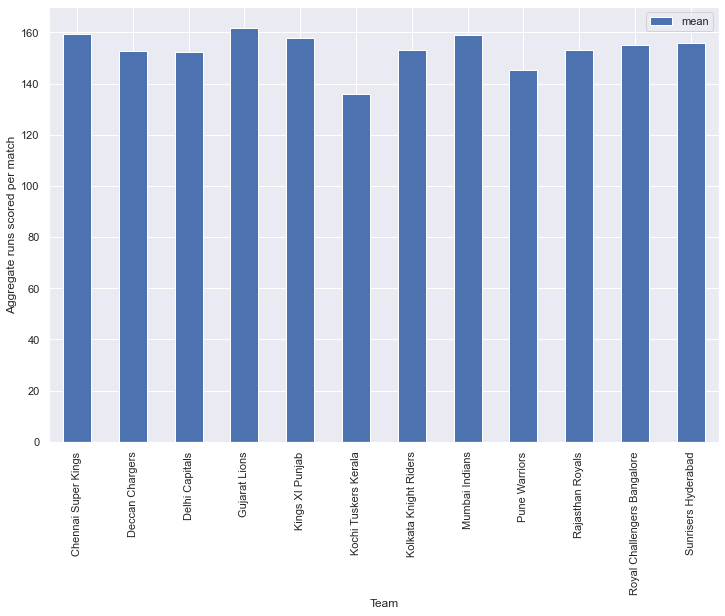

In [21]:
Agg_score.plot(y='mean', kind = 'bar');
plt.xlabel("Team");
plt.ylabel("Aggregate runs scored per match");

## Aggregate total team runs conceeded per match and distribution of avg runs team conceeded per match

In [22]:
Total_Runs_Conceeded = ipl_df.groupby(['id','season','bowling_team'])['total_runs'].sum()
Total_Runs_Conceeded

id       season  bowling_team               
335982   2008    Kolkata Knight Riders           82
                 Royal Challengers Bangalore    222
335983   2008    Chennai Super Kings            207
                 Kings XI Punjab                240
335984   2008    Delhi Capitals                 129
                                               ... 
1237178  2020    Sunrisers Hyderabad            131
1237180  2020    Delhi Capitals                 172
                 Sunrisers Hyderabad            189
1237181  2020    Delhi Capitals                 157
                 Mumbai Indians                 156
Name: total_runs, Length: 1628, dtype: int64

In [23]:
Agg_Runs_Conceeded = Total_Runs_Conceeded.groupby(['bowling_team']).agg(['mean'])
Agg_Runs_Conceeded

mean
bowling_team                           
Chennai Super Kings          153.061798
Deccan Chargers              154.906667
Delhi Capitals               155.782383
Gujarat Lions                169.300000
Kings XI Punjab              160.142105
Kochi Tuskers Kerala         141.857143
Kolkata Knight Riders        152.989583
Mumbai Indians               153.487685
Pune Warriors                151.333333
Rajasthan Royals             154.406250
Royal Challengers Bangalore  157.711340
Sunrisers Hyderabad          152.693548

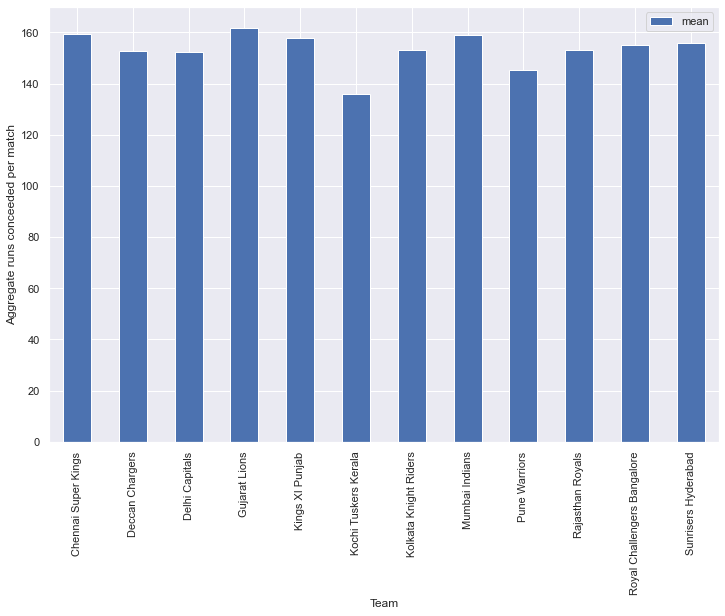

In [24]:
Agg_score.plot(y='mean', kind = 'bar');
plt.xlabel("Team");
plt.ylabel("Aggregate runs conceeded per match");

## Aggregate total wickets taken by the team and distribution of avg wickets taken per match

In [25]:
Tot_wickets_taken = ipl_df.groupby(['id','season','bowling_team'])['is_wicket'].sum()
Tot_wickets_taken

id       season  bowling_team               
335982   2008    Kolkata Knight Riders          10
                 Royal Challengers Bangalore     3
335983   2008    Chennai Super Kings             4
                 Kings XI Punjab                 5
335984   2008    Delhi Capitals                  8
                                                ..
1237178  2020    Sunrisers Hyderabad             7
1237180  2020    Delhi Capitals                  8
                 Sunrisers Hyderabad             3
1237181  2020    Delhi Capitals                  5
                 Mumbai Indians                  7
Name: is_wicket, Length: 1628, dtype: int64

In [26]:
Agg_wickets_taken = Tot_wickets_taken.groupby(['bowling_team']).agg(['mean'])
Agg_wickets_taken

mean
bowling_team                         
Chennai Super Kings          6.202247
Deccan Chargers              5.946667
Delhi Capitals               5.823834
Gujarat Lions                4.966667
Kings XI Punjab              5.631579
Kochi Tuskers Kerala         5.285714
Kolkata Knight Riders        5.619792
Mumbai Indians               6.093596
Pune Warriors                5.653333
Rajasthan Royals             5.687500
Royal Challengers Bangalore  5.747423
Sunrisers Hyderabad          6.072581

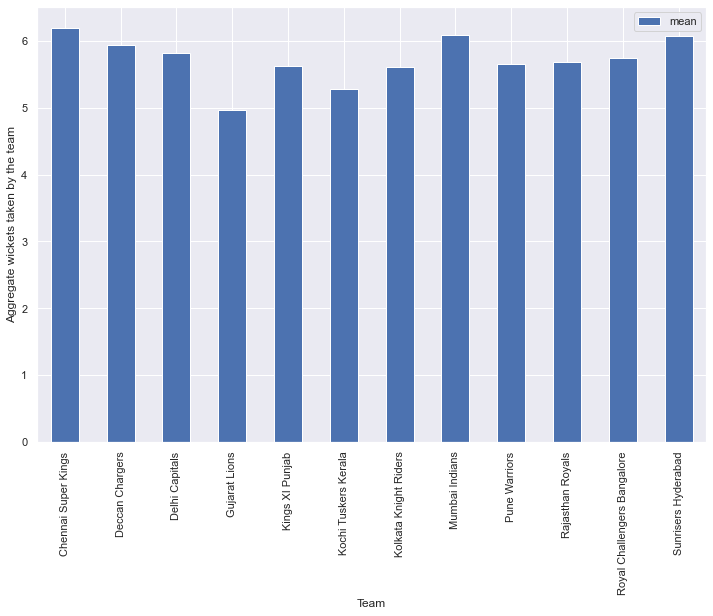

In [27]:
Agg_wickets_taken.plot(y='mean', kind = 'bar');
plt.xlabel("Team");
plt.ylabel("Aggregate wickets taken by the team");

## Aggregate total wickets lost by the team and distribution of avg wickets lost per match

In [28]:
Tot_wickets_lost = ipl_df.groupby(['id','season','batting_team'])['is_wicket'].sum()
Tot_wickets_lost

id       season  batting_team               
335982   2008    Kolkata Knight Riders           3
                 Royal Challengers Bangalore    10
335983   2008    Chennai Super Kings             5
                 Kings XI Punjab                 4
335984   2008    Delhi Capitals                  1
                                                ..
1237178  2020    Sunrisers Hyderabad             4
1237180  2020    Delhi Capitals                  3
                 Sunrisers Hyderabad             8
1237181  2020    Delhi Capitals                  7
                 Mumbai Indians                  5
Name: is_wicket, Length: 1630, dtype: int64

In [29]:
Agg_wickets_lost = Tot_wickets_lost.groupby(['batting_team']).agg(['mean'])
Agg_wickets_lost

mean
batting_team                         
Chennai Super Kings          5.157303
Deccan Chargers              6.453333
Delhi Capitals               5.989691
Gujarat Lions                6.266667
Kings XI Punjab              6.057895
Kochi Tuskers Kerala         6.142857
Kolkata Knight Riders        5.755208
Mumbai Indians               5.857143
Pune Warriors                6.080000
Rajasthan Royals             5.956250
Royal Challengers Bangalore  5.723077
Sunrisers Hyderabad          5.540323

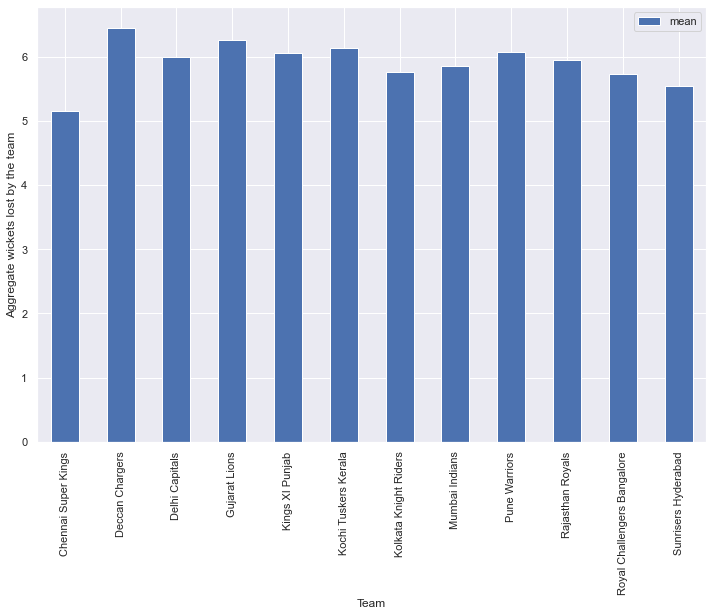

In [30]:
Agg_wickets_lost.plot(y='mean', kind = 'bar');
plt.xlabel("Team");
plt.ylabel("Aggregate wickets lost by the team");

## Toss Analysis

In [31]:
toss_win  = ipl_df['toss_winner'].value_counts().rename_axis('Team').reset_index(name='Toss_wins')
total_games = ipl_df['team1'].value_counts() + ipl_df['team2'].value_counts()
total_games = total_games.rename_axis('Team').reset_index(name='Total_Matches').sort_values('Total_Matches', ascending = False).reset_index().drop(columns = 'index')
toss = pd.merge(toss_win, total_games, on ='Team')

In [32]:
#Max wins
mw = ipl_df['winner'].value_counts().rename_axis('Team').reset_index(name='wins')
toss = pd.merge(toss, mw, on='Team')

In [33]:
toss['Percent_Tosswin'] = (toss['Toss_wins']/ toss['Total_Matches']) * 100
toss['Percent_wins'] = (toss['wins']/toss['Total_Matches'])*100
toss = toss.sort_values('Percent_wins', ascending = False).reset_index().drop(columns = 'index')

In [34]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=toss['Team'],
                y=toss['Percent_wins'],
                name='Percent_wins',
                ))
fig.add_trace(go.Bar(x=toss['Team'],
                y=toss['Percent_Tosswin'],
                name='Percent_Tosswin',
                ))
fig.update_layout(barmode='group',
                  bargap=0.15,                 # gap between bars of adjacent location coordinates.
                  bargroupgap=0.0,             # gap between bars of the same location coordinate.
                  title_text = 'Comparison of wins and toss percentage',
                  title={ 'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'
                  }
                  )
fig.show()

## Number of wins for each team per season

In [35]:
ipl_df['season'] = ipl_df['date'].dt.year

In [36]:
df3 = ipl_df.groupby(['id','season'])['winner'].unique()
df4 = df3.to_frame().reset_index()
df4['winner'] = [str(val) for val in df4['winner']]
win_per_season = df4.groupby('season')['winner'].value_counts()
win_per_season

season  winner                         
2008    ['Rajasthan Royals']               13
        ['Kings XI Punjab']                10
        ['Chennai Super Kings']             9
        ['Delhi Capitals']                  7
        ['Mumbai Indians']                  7
                                           ..
2020    ['Kolkata Knight Riders']           7
        ['Royal Challengers Bangalore']     7
        ['Chennai Super Kings']             6
        ['Kings XI Punjab']                 6
        ['Rajasthan Royals']                6
Name: winner, Length: 111, dtype: int64

In [37]:
year = 2008
col = ['year','winner','num_wins']
wins_per_season_df = pd.DataFrame(columns=col)
for item in win_per_season.iteritems():
    if(item[0][0] == year):
        print(item)
        wins = pd.DataFrame({
            'year':[item[0][0]],
            'winner':[item[0][1]],
            'num_wins':item[1]
        })
        wins_per_season_df = wins_per_season_df.append(wins)
        year = year + 1

((2008, "['Rajasthan Royals']"), 13)
((2009, "['Delhi Capitals']"), 10)
((2010, "['Mumbai Indians']"), 11)
((2011, "['Chennai Super Kings']"), 11)
((2012, "['Kolkata Knight Riders']"), 12)
((2013, "['Mumbai Indians']"), 13)
((2014, "['Kings XI Punjab']"), 12)
((2015, "['Chennai Super Kings']"), 10)
((2016, "['Sunrisers Hyderabad']"), 11)
((2017, "['Mumbai Indians']"), 12)
((2018, "['Chennai Super Kings']"), 11)
((2019, "['Mumbai Indians']"), 11)
((2020, "['Mumbai Indians']"), 11)


/var/folders/vv/mlt5zdhs20d7mbt5sm8sy0_40000gn/T/ipykernel_31679/832052737.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/vv/mlt5zdhs20d7mbt5sm8sy0_40000gn/T/ipykernel_31679/832052737.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/vv/mlt5zdhs20d7mbt5sm8sy0_40000gn/T/ipykernel_31679/832052737.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/vv/mlt5zdhs20d7mbt5sm8sy0_40000gn/T/ipykernel_31679/832052737.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/vv/mlt5zdhs20d7mbt5sm8sy0_40000gn/T/ipykernel_31679/832052737.py:12: FutureWarning:

The frame.append method is depreca

In [44]:
wins_per_season_df.reset_index(drop=True)

year                     winner num_wins
0   2008       ['Rajasthan Royals']       13
1   2009         ['Delhi Capitals']       10
2   2010         ['Mumbai Indians']       11
3   2011    ['Chennai Super Kings']       11
4   2012  ['Kolkata Knight Riders']       12
5   2013         ['Mumbai Indians']       13
6   2014        ['Kings XI Punjab']       12
7   2015    ['Chennai Super Kings']       10
8   2016    ['Sunrisers Hyderabad']       11
9   2017         ['Mumbai Indians']       12
10  2018    ['Chennai Super Kings']       11
11  2019         ['Mumbai Indians']       11
12  2020         ['Mumbai Indians']       11

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='num_wins', ylabel='winner'>

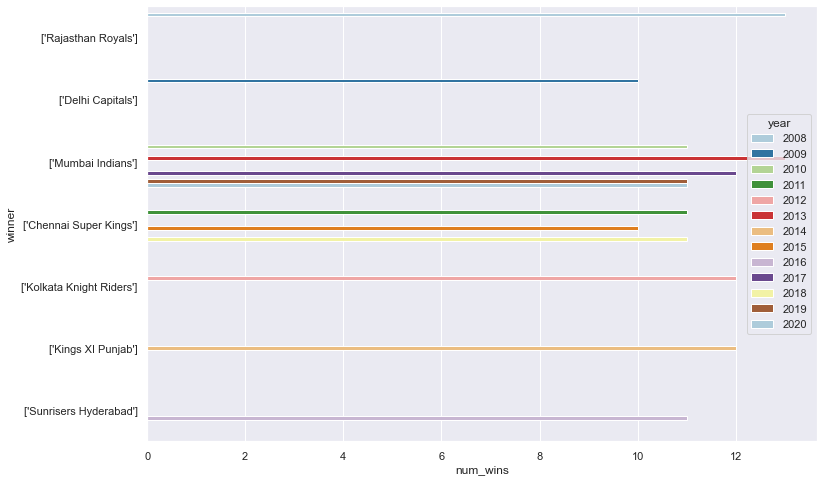

In [39]:
sns.barplot('num_wins', 'winner', hue='year', data=wins_per_season_df, palette='Paired')

The above bar plot shows the most number of win by a team in each IPL season

## Most successful team of IPL

In [40]:
teams_wins_suc = df4['winner'].value_counts()
teams_wins_suc_df = pd.DataFrame(columns=['team','num_wins'])
for items in teams_wins_suc.iteritems():
    temp_df = pd.DataFrame({
        'team':[items[0]],
        'num_wins':[items[1]]
    })
    teams_wins_suc_df = teams_wins_suc_df.append(temp_df,ignore_index = True)

/var/folders/vv/mlt5zdhs20d7mbt5sm8sy0_40000gn/T/ipykernel_31679/103074004.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [45]:
teams_wins_suc_df.dropna(axis=0,inplace=True)
teams_wins_suc_df = teams_wins_suc_df.drop(12)
teams_wins_suc_df

team num_wins
0                ['Mumbai Indians']      120
1           ['Chennai Super Kings']      106
2         ['Kolkata Knight Riders']       99
3   ['Royal Challengers Bangalore']       91
4               ['Kings XI Punjab']       88
5                ['Delhi Capitals']       86
6              ['Rajasthan Royals']       81
7           ['Sunrisers Hyderabad']       66
8               ['Deccan Chargers']       29
9                 ['Pune Warriors']       27
10                ['Gujarat Lions']       13
11         ['Kochi Tuskers Kerala']        6

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Total wins of IPL Teams'}, xlabel='num_wins', ylabel='team'>

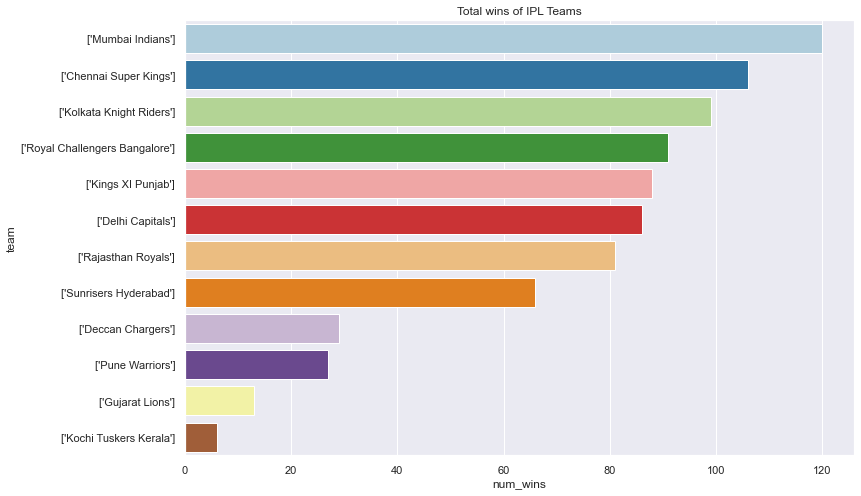

In [46]:
plt.title("Total wins of IPL Teams")
sns.barplot('num_wins', 'team', data=teams_wins_suc_df, palette='Paired')

As we can see from the above sns plot, Mumbai Indians has most wins in IPL and hence the most successful 
team

## Most valuable player

In [47]:
mvp = ipl_match_df['player_of_match'].value_counts()

mvp_df = pd.DataFrame(columns=['player', 'wins'])
for items in mvp.iteritems():
        temp_df = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_df = mvp_df.append(temp_df, ignore_index=True) 

/var/folders/vv/mlt5zdhs20d7mbt5sm8sy0_40000gn/T/ipykernel_31679/2308506708.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [48]:
mvp_top_ten_df = mvp_df.head(10)
mvp_top_ten_df

player wins
0  AB de Villiers   23
1        CH Gayle   22
2       RG Sharma   18
3       DA Warner   17
4        MS Dhoni   17
5       SR Watson   16
6       YK Pathan   16
7        SK Raina   14
8         V Kohli   13
9       G Gambhir   13

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Top Ten IPL Players'}, xlabel='wins', ylabel='player'>

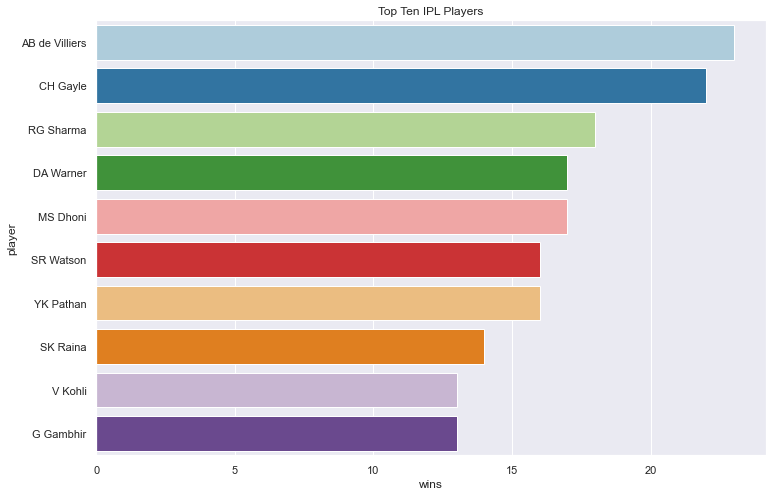

In [49]:
plt.title("Top Ten IPL Players")
sns.barplot('wins', 'player', data=mvp_top_ten_df, palette='Paired')

As you can see, AB de Villiers is the most valuable player of IPL

## Total runs across all seasons

In [125]:
ipl_df['total_runs'].skew()

1.5575927546902586

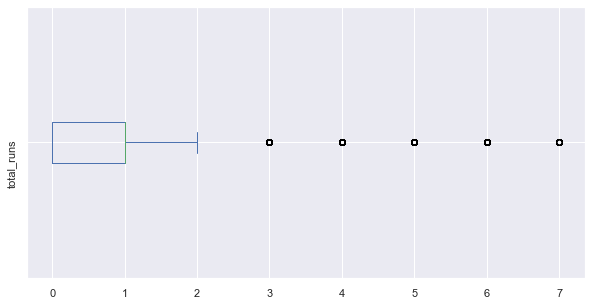

In [126]:
ipl_df['total_runs'].plot(kind='box', vert=False)
plt.yticks(rotation=90);

<AxesSubplot:ylabel='Frequency'>

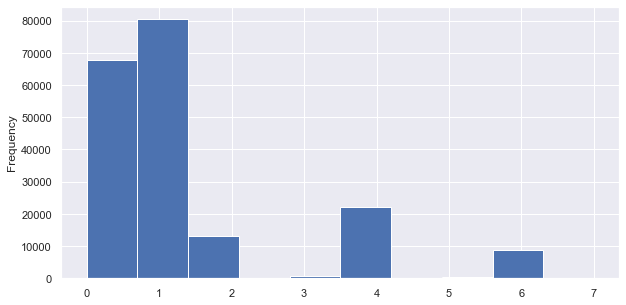

In [127]:
ipl_df['total_runs'].plot(kind='hist', bins = 10)

The skewness value is positive. This indicates a positively skewed distribution which is asymmetrical and most data falls to the right, or positive side, of the graph's peak. Therefore resulting in a longer tail towards the right side of the distribution.

Text(0, 0.5, 'Frequency')

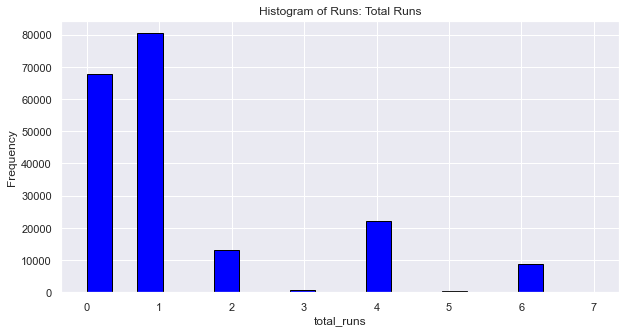

In [128]:
plt.hist(ipl_df['total_runs'], color = 'blue', edgecolor = 'black',
         bins = int(100/5))

"""# seaborn histogram
sns.distplot(tips['total_bill'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})"""
# Add labels
plt.title('Histogram of Runs: Total Runs')
plt.xlabel('total_runs')
plt.ylabel('Frequency')

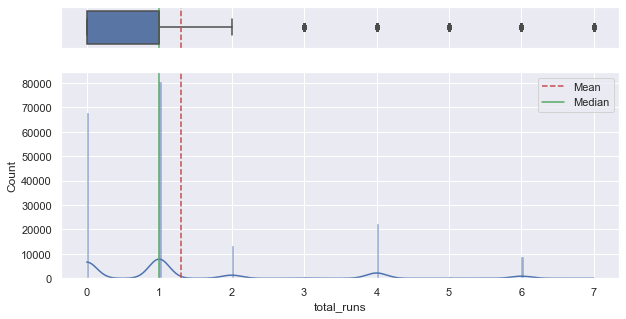

In [129]:
#Avanced histogram plot with mean and median
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=ipl_df['total_runs'].mean()
median=ipl_df['total_runs'].median()


sns.boxplot(data=ipl_df, x="total_runs", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')


sns.histplot(data=ipl_df, x="total_runs", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")


ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

The value of the mode is to the left of the value of the median as the peak of the graph (mode) occurs to the left of the median. Also, the mean comes to the right of the median since most of the values or observations fall on the right side of the graph. The tapering ends of the skewed data distributions are the outliers in the data.

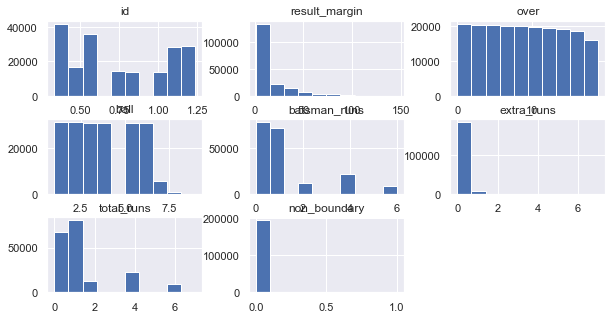

In [130]:
ipl_df.hist()
plt.show()

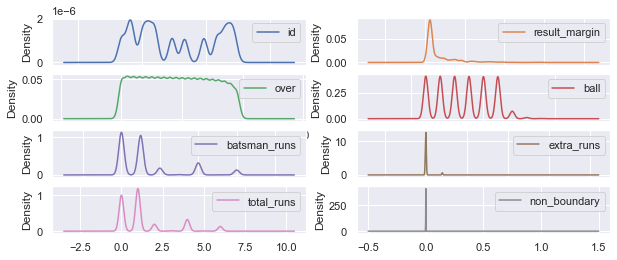

In [131]:
ipl_df.plot(kind='density', subplots=True, layout=(5,2), sharex=False)
plt.show()

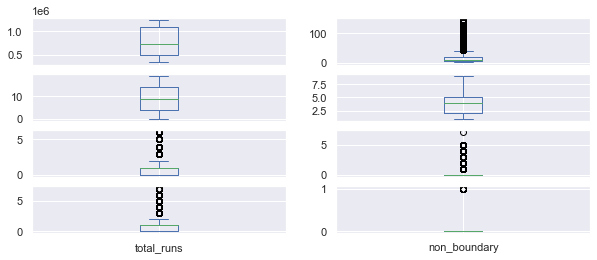

In [132]:
ipl_df.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

In [133]:
ipl_df['result_margin'].skew()

2.664363759867549

array([[<AxesSubplot:title={'center':'result_margin'}>]], dtype=object)

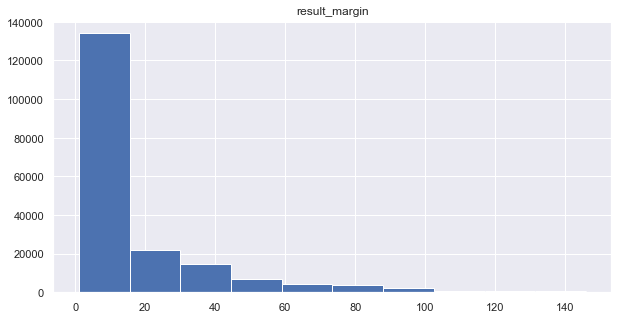

In [134]:
ipl_df.hist(column='result_margin')

The skewness value is positive indicating a positively skewed distribution which is asymmetrical and most data falls to the right, or positive side, of the graph's peak. Therefore resulting in a longer tail towards the right side of the distribution. Since the skewness value is greater than 1, the data is highly skewed.

In [135]:
ipl_df.batsman_runs.skew()

1.5869112546438762

array([[<AxesSubplot:title={'center':'batsman_runs'}>]], dtype=object)

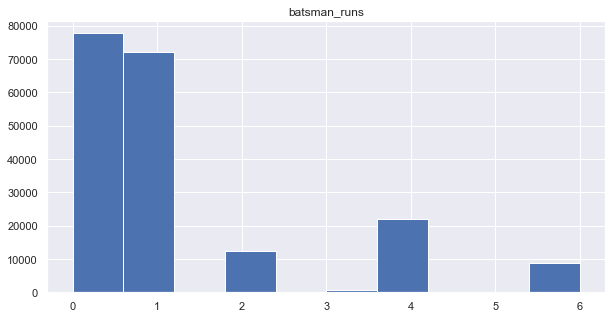

In [136]:
ipl_df.hist(column='batsman_runs')

The histogram depicts that the data is positively skewed resulting in a longer tail towards the right side of the distribtuion. The skewness value( greater than 1) indicates that the data is highly right skewed.

In [137]:
ipl_df.total_runs.skew()

1.5575927546902586

array([[<AxesSubplot:title={'center':'total_runs'}>]], dtype=object)

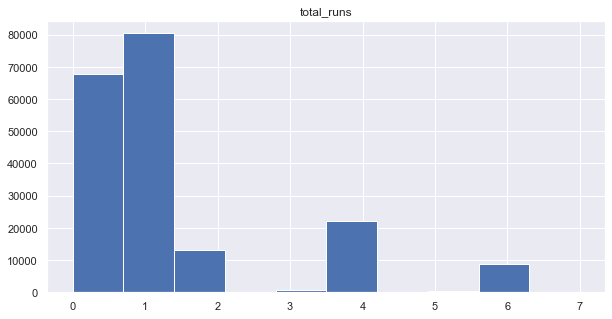

In [138]:
ipl_df.hist(column='total_runs')

The skewness value is positive indicating a positively skewed distribution which is asymmetrical and most data falls to the right, or positive side, of the graph's peak. Therefore resulting in a longer tail towards the right side of the distribution. Since the skewness value is greater than 1, the data is highly right skewed.

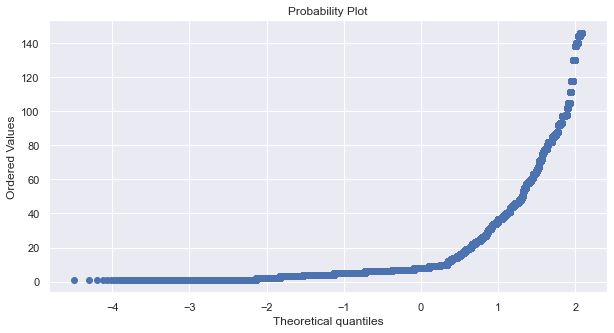

In [139]:
stats.probplot(ipl_df['result_margin'], dist="norm", plot=pylab)
pylab.show()

The parameter "result_margin" when plotted against the theoretical distribution does not form a straight line. It rather shows a exponential pattern indicating that the data is not normal. 

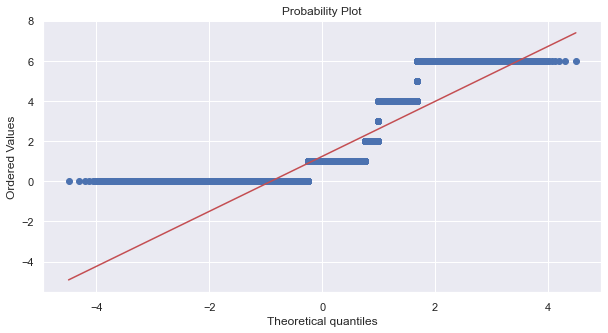

In [140]:
stats.probplot(ipl_df['batsman_runs'], dist="norm", plot=pylab)
pylab.show() 

The above plot does not indicate a straight line , thus can be inferred that the parameter does not follow a normal distribution.

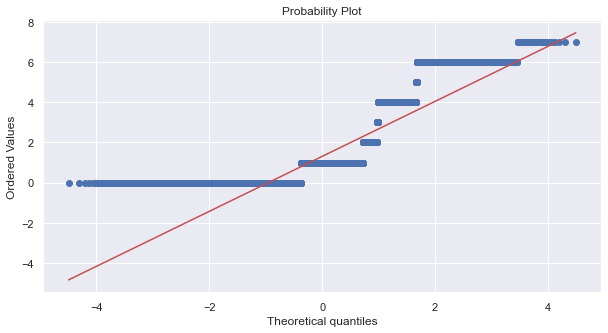

In [141]:
stats.probplot(ipl_df['total_runs'], dist="norm", plot=pylab)
pylab.show() 

The data does not form a straight line when plotted against the theoretical values indicating that, it does not follow the normal distribution.

## Runs per over

In [142]:
#Runs per over
overs_grp = ipl_df.groupby(by='over')['total_runs'].agg(['mean']).reset_index()
#overs_grp.rename(columns ={'mean':'Average_number_of_runs_per_over'}, inplace = True).reset_index()
overs_grp

over      mean
0      0  0.956115
1      1  1.135251
2      2  1.280650
3      3  1.319624
4      4  1.328280
5      5  1.338035
6      6  1.081728
7      7  1.155609
8      8  1.204235
9      9  1.197077
10    10  1.236719
11    11  1.266958
12    12  1.279013
13    13  1.327945
14    14  1.382652
15    15  1.419120
16    16  1.494871
17    17  1.574620
18    18  1.618099
19    19  1.758837

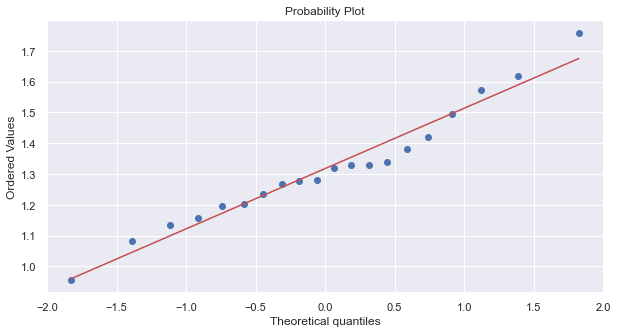

In [143]:
stats.probplot(overs_grp['mean'], dist="norm", plot=pylab)
pylab.show() 

The average runs per over, when plotted against the theoretical values approximately forms a straight line indicating normality.

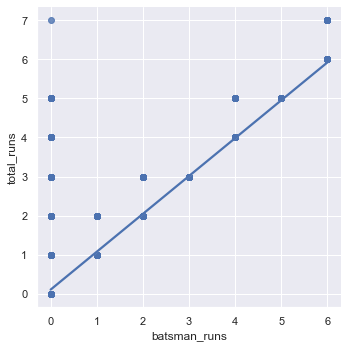

In [144]:
sns.lmplot(x="batsman_runs", y="total_runs", data=ipl_df)

The scatterplot depicts that the batsman_runs and total_runs are positively correlated as expected. But it does not have a perfect fit since the extra_runs are taken into account in the total_runs.

In [145]:
#columns = ipl_df
corr = ipl_df.corr()
corr

id  result_margin      over      ball  batsman_runs  \
id             1.000000      -0.012463  0.007874 -0.001956      0.028446   
result_margin -0.012463       1.000000 -0.000867  0.001645      0.003136   
over           0.007874      -0.000867  1.000000 -0.006877      0.086966   
ball          -0.001956       0.001645 -0.006877  1.000000      0.007168   
batsman_runs   0.028446       0.003136  0.086966  0.007168      1.000000   
extra_runs    -0.018331       0.004141 -0.001303 -0.002487     -0.140883   
total_runs     0.024763       0.004041  0.087345  0.006693      0.977587   
non_boundary   0.000249       0.002085 -0.001185 -0.002156      0.019815   

               extra_runs  total_runs  non_boundary  
id              -0.018331    0.024763      0.000249  
result_margin    0.004141    0.004041      0.002085  
over            -0.001303    0.087345     -0.001185  
ball            -0.002487    0.006693     -0.002156  
batsman_runs    -0.140883    0.977587      0.019815  
extra_runs       1.000000    0.070707     -0.001777  
total_runs       0.070707    1.000000      0.019587  
non_boundary    -0.001777    0.019587      1.000000

<AxesSubplot:>

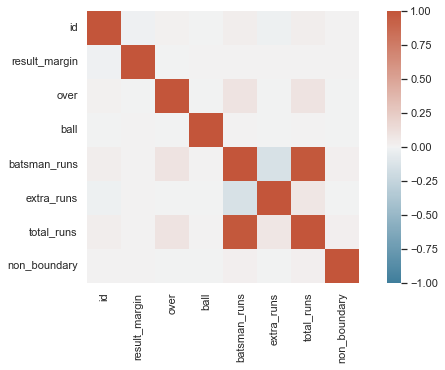

In [146]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap)

The batsman_runs and the total_runs have a highly positive correlation as expected.

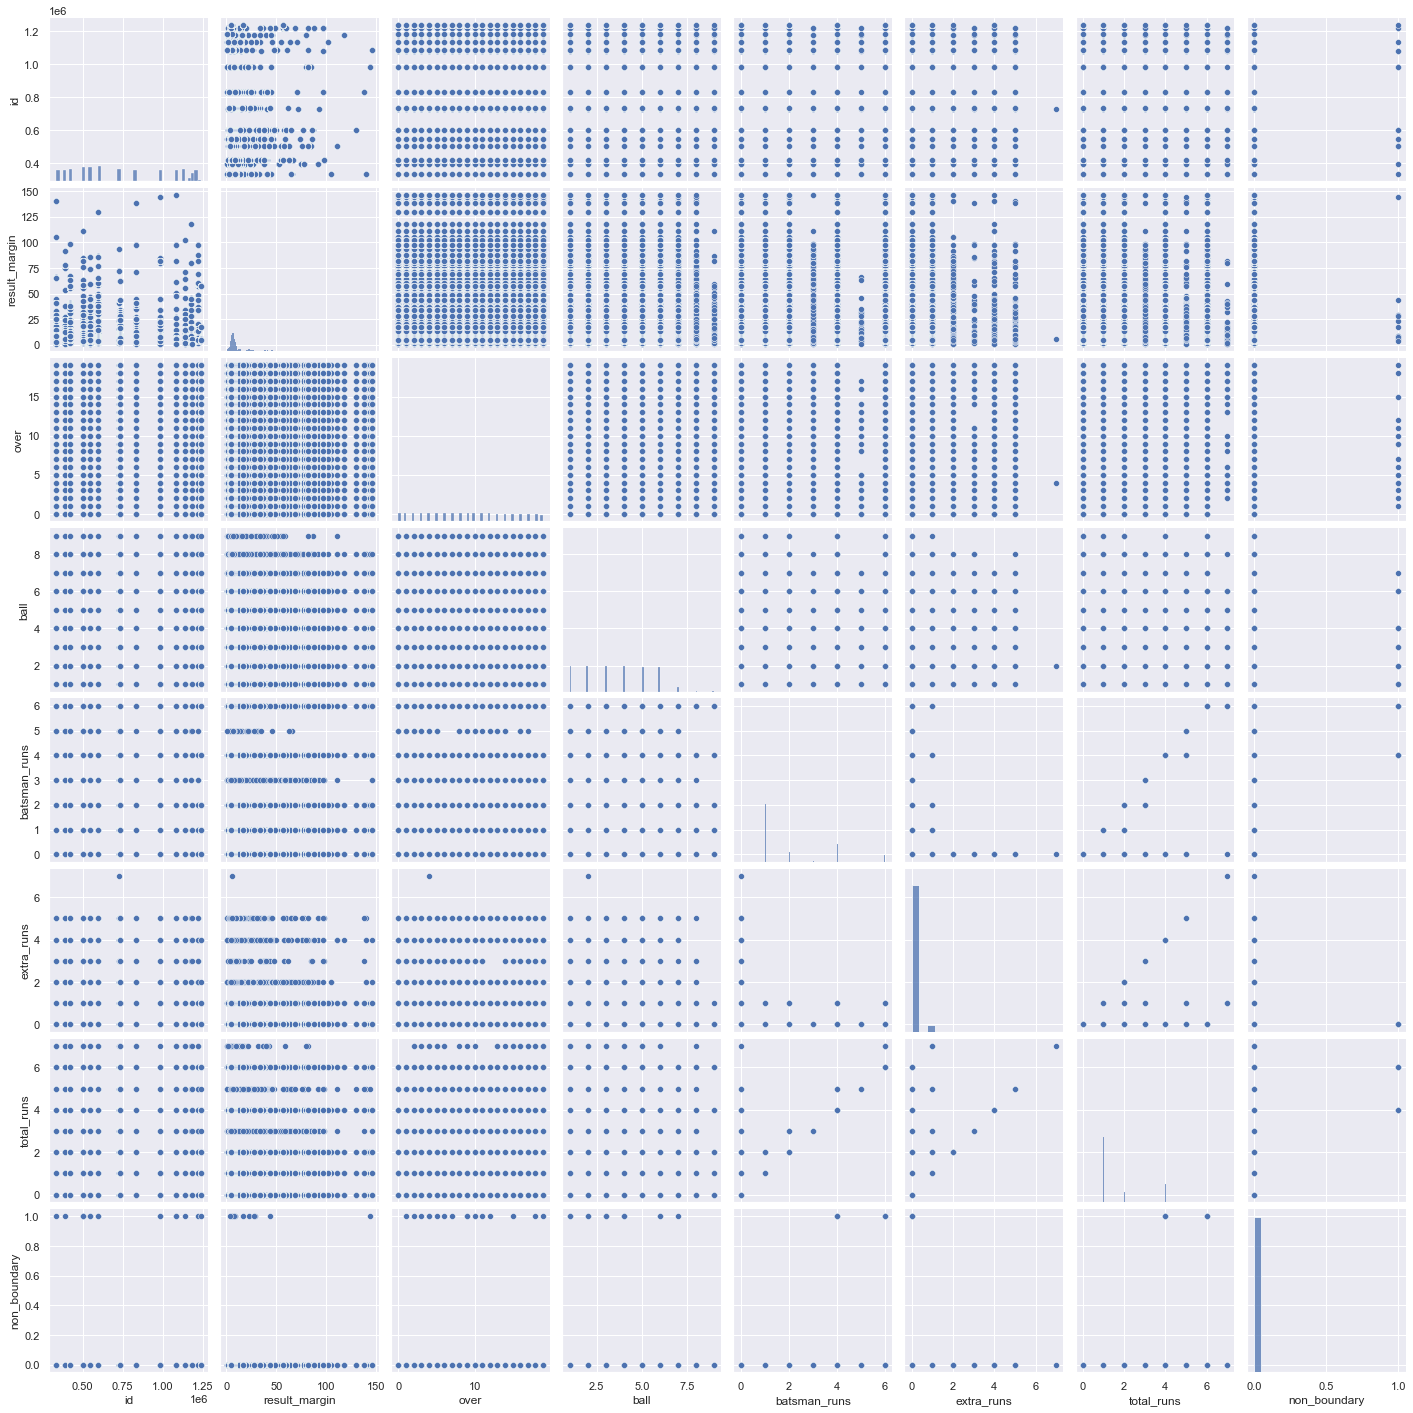

In [147]:
sns.pairplot(ipl_df)

From the pair plots above, it is evident that the parameters "batsman_runs" and "extra_runs" have a positive correlation with the "total_runs". There is no other significant inferences obtained expect for the above features. 

## Total runs scored across all seasons

In [50]:
#total runs scored across seasons
trun_season = ipl_df.groupby(['season'])['total_runs'].sum().reset_index()

The data is grouped by Season and the overall runs scored in each season is calculated.

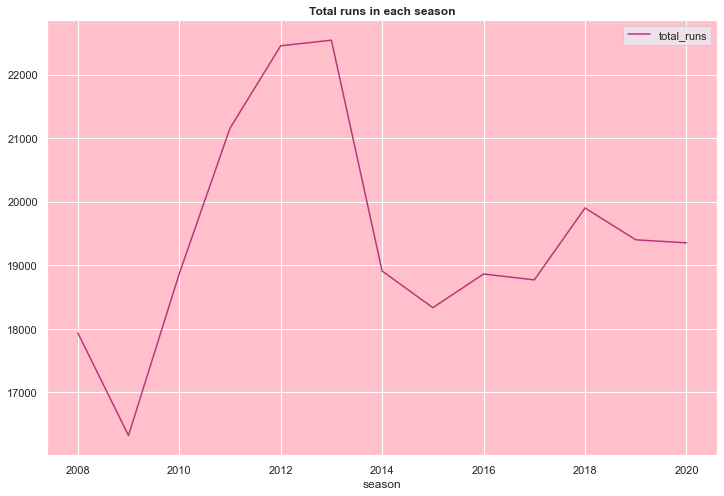

In [51]:
rs = trun_season.set_index('season') # highest total_runs scored in season 2013
ax = plt.axes()
ax.set(facecolor = "pink") 
sns.lineplot(data= rs,palette="magma") 
plt.title('Total runs in each season',fontsize=12,fontweight="bold") 
plt.show() 

The line plot shows the total runs in each season. The highest runs is scored in Season 2013.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020')])

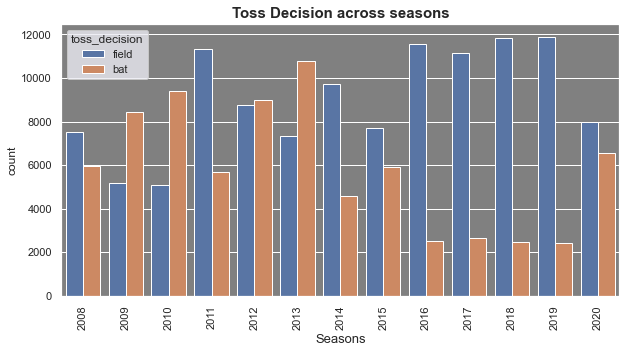

In [151]:
ax = plt.axes()
ax.set(facecolor='grey')
sns.set({'figure.figsize':(10,5)})
sns.countplot( x = 'Season', hue = 'toss_decision', data = ipl_df)
plt.xlabel('Seasons', fontsize = 13)
#plt.ylabel('Count', fontsize = 13)
plt.title('Toss Decision across seasons', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 90)

The countplot shows the overall decisions made (field/bat) in each of the Seasons.

## matches won after winning the toss

/Users/rakshan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


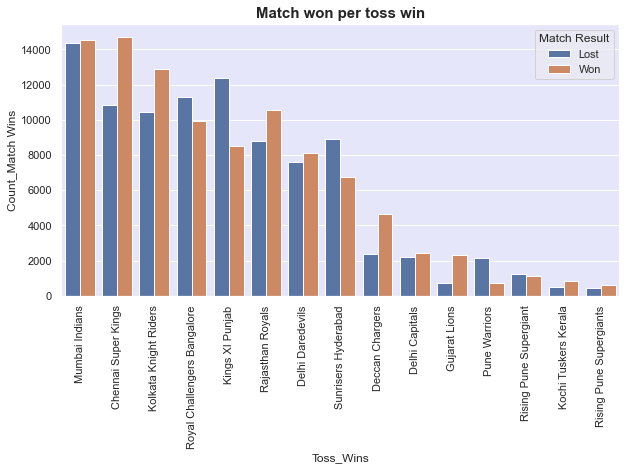

In [152]:
#matches won after winning the toss
twin_mwin = ipl_df['toss_winner'] == ipl_df['winner']
ax = plt.axes()
ax.set(facecolor='lavender')
sns.set({'figure.figsize':(10,5)}, style = 'darkgrid')
sns.countplot(ipl_df['winner'], hue = twin_mwin, order = ipl_df['winner'].value_counts().index) 
plt.xticks(rotation = 90)
plt.xlabel('Toss_Wins')
plt.ylabel('Count_Match Wins')
plt.title('Match won per toss win', fontsize = 15, fontweight = 'bold')
plt.legend(title='Match Result', loc='upper right', labels=['Lost', 'Won']) 

In here, the count plot represents the number and wins and losses for each team given that they had win the toss.

## decision(bat/bowl) made by the teamsafter winning a toss

/Users/rakshan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Toss Decision per Team')

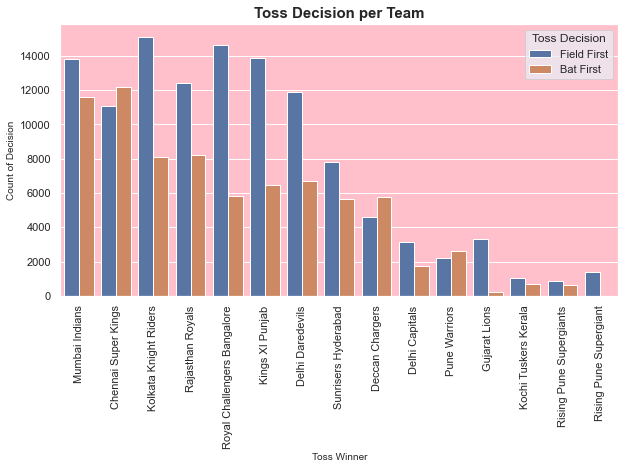

In [153]:
#decision(bat/bowl) made by the teamsafter winning a toss
ax = plt.axes()
ax.set(facecolor='pink')
sns.set({'figure.figsize':(10,5)}, style = 'darkgrid')
sns.countplot(ipl_df['toss_winner'], hue=ipl_df['toss_decision'], order = ipl_df['toss_winner'].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(title = 'Toss Decision', loc = 'upper right',labels = ['Field First', 'Bat First'])
plt.xlabel('Toss Winner', fontsize = 10)
plt.ylabel('Count of Decision', fontsize = 10)
plt.title('Toss Decision per Team', fontsize = 15, fontweight = 'bold')

This countplot represents the data of the overall decisions made ( field/bat ) by each team after being the toss winners.

In [154]:
numberOfruns = ipl_df[ipl_df['total_runs']>4]

print("Number of overs with more than 4 runs:",numberOfruns.count()[1], "overs")

Number of overs with more than 4 runs: 9137 overs


In [155]:
df_2=ipl_df[(ipl_df.batsman_runs == 4)|(ipl_df.batsman_runs == 6)]
df_2

id       city        date player_of_match  \
18       335982  Bangalore  2008-04-18     BB McCullum   
21       335982  Bangalore  2008-04-18     BB McCullum   
23       335982  Bangalore  2008-04-18     BB McCullum   
27       335982  Bangalore  2008-04-18     BB McCullum   
33       335982  Bangalore  2008-04-18     BB McCullum   
...         ...        ...         ...             ...   
193420  1237181      Dubai  2020-11-10        TA Boult   
193441  1237181      Dubai  2020-11-10        TA Boult   
193444  1237181      Dubai  2020-11-10        TA Boult   
193454  1237181      Dubai  2020-11-10        TA Boult   
193458  1237181      Dubai  2020-11-10        TA Boult   

                                      venue                        team1  \
18                    M Chinnaswamy Stadium  Royal Challengers Bangalore   
21                    M Chinnaswamy Stadium  Royal Challengers Bangalore   
23                    M Chinnaswamy Stadium  Royal Challengers Bangalore   
27                    M Chinnaswamy Stadium  Royal Challengers Bangalore   
33                    M Chinnaswamy Stadium  Royal Challengers Bangalore   
...                                     ...                          ...   
193420  Dubai International Cricket Stadium               Delhi Capitals   
193441  Dubai International Cricket Stadium               Delhi Capitals   
193444  Dubai International Cricket Stadium               Delhi Capitals   
193454  Dubai International Cricket Stadium               Delhi Capitals   
193458  Dubai International Cricket Stadium               Delhi Capitals   

                        team2                  toss_winner toss_decision  \
18      Kolkata Knight Riders  Royal Challengers Bangalore         field   
21      Kolkata Knight Riders  Royal Challengers Bangalore         field   
23      Kolkata Knight Riders  Royal Challengers Bangalore         field   
27      Kolkata Knight Riders  Royal Challengers Bangalore         field   
33      Kolkata Knight Riders  Royal Challengers Bangalore         field   
...                       ...                          ...           ...   
193420         Mumbai Indians               Delhi Capitals           bat   
193441         Mumbai Indians               Delhi Capitals           bat   
193444         Mumbai Indians               Delhi Capitals           bat   
193454         Mumbai Indians               Delhi Capitals           bat   
193458         Mumbai Indians               Delhi Capitals           bat   

                       winner  ... batsman_runs  extra_runs total_runs  \
18      Kolkata Knight Riders  ...            6           0          6   
21      Kolkata Knight Riders  ...            4           0          4   
23      Kolkata Knight Riders  ...            6           0          6   
27      Kolkata Knight Riders  ...            6           0          6   
33      Kolkata Knight Riders  ...            4           0          4   
...                       ...  ...          ...         ...        ...   
193420         Mumbai Indians  ...            4           0          4   
193441         Mumbai Indians  ...            6           0          6   
193444         Mumbai Indians  ...            6           0          6   
193454         Mumbai Indians  ...            4           0          4   
193458         Mumbai Indians  ...            6           0          6   

       non_boundary is_wicket fielder  extras_type           batting_team  \
18                0         0     NaN          NaN  Kolkata Knight Riders   
21                0         0     NaN          NaN  Kolkata Knight Riders   
23                0         0     NaN          NaN  Kolkata Knight Riders   
27                0         0     NaN          NaN  Kolkata Knight Riders   
33                0         0     NaN          NaN  Kolkata Knight Riders   
...             ...       ...     ...          ...                    ...   
193420            0         0     NaN          NaN         Del

The data is being filtered based on the batsman_runs which is either four or six and saved in the df_2 dataframe.

## Hard hitting ability

In [156]:
#Hard-hitting Ability
batsman_hh_grp = df_2.groupby(by='batsman')['batsman_runs'].agg(['count']).reset_index()
batsman_hh_grp.rename(columns ={'count':'Number_of_fours_and_sixes'}, inplace = True)
batsman_hh_grp

batsman  Number_of_fours_and_sixes
0    A Ashish Reddy                         31
1          A Chopra                          7
2       A Choudhary                          2
3        A Flintoff                          7
4          A Kumble                          3
..              ...                        ...
434       YK Pathan                        421
435     YV Takawale                         29
436   Yashpal Singh                          5
437    Yuvraj Singh                        366
438          Z Khan                         13

[439 rows x 2 columns]

In [157]:
batsman_hh_grp=batsman_hh_grp.sort_values(by=['Number_of_fours_and_sixes'], ascending=False)
batsman_hh_grp_top_20=batsman_hh_grp.head(20)

The dataframe df_2 is being grouped by the Batsman and the total Number of fours and sixes scored by each batsman is calculated. Then, it is arranged in descending order showing the top batsmen who had scored the highest number of fours and sixes.

<AxesSubplot:xlabel='batsman'>

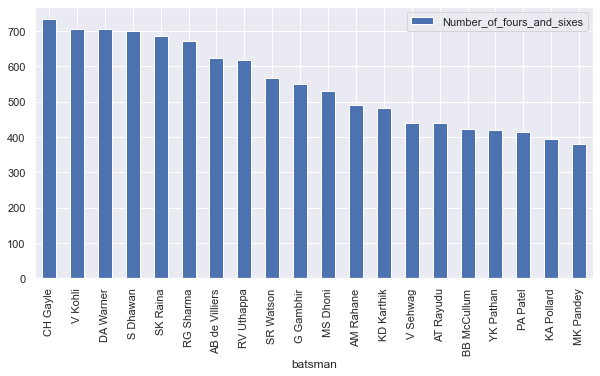

In [158]:
batsman_hh_grp_top_20.plot(x="batsman", y="Number_of_fours_and_sixes", kind="bar")

Chris Gayle has topped the list followed by Virat Kohli and David Warner.

In [159]:
#number of balls per batsman
batsman_total_balls_grp = ipl_df.groupby(by='batsman')['ball'].agg(['count']).reset_index()
batsman_total_balls_grp.rename(columns ={'count':'Number_of_balls_played'}, inplace = True)
batsman_total_balls_grp

batsman  Number_of_balls_played
0    A Ashish Reddy                     196
1        A Chandila                       7
2          A Chopra                      75
3       A Choudhary                      20
4       A Dananjaya                       5
..              ...                     ...
532     YV Takawale                     183
533   Yashpal Singh                      67
534     Younis Khan                       7
535    Yuvraj Singh                    2205
536          Z Khan                     141

[537 rows x 2 columns]

The data is being grouped by the Batsman and the number of balls faced by each of them is calculated.

In [160]:
HH_batsman_df=pd.merge(batsman_hh_grp,batsman_total_balls_grp,on='batsman')
HH_batsman_df

batsman  Number_of_fours_and_sixes  Number_of_balls_played
0      CH Gayle                        733                    3342
1       V Kohli                        706                    4609
2     DA Warner                        705                    3819
3      S Dhawan                        700                    4208
4      SK Raina                        687                    4041
..          ...                        ...                     ...
434  GD McGrath                          1                       5
435    TS Mills                          1                      11
436   KAJ Roach                          1                       9
437    UA Birla                          1                      15
438   DNT Zoysa                          1                       9

[439 rows x 3 columns]

The dataframes batsman_hh_grp (containing the number of 4 & 6 hit by the batsman) and batsman_total_balls (containing the total number of balls faced by each batsman) are merged on the common parameter "batsman".

In [161]:
HH_batsman_df['Hard_hitting_score']=HH_batsman_df['Number_of_fours_and_sixes']/HH_batsman_df['Number_of_balls_played']
HH_batsman_df

batsman  Number_of_fours_and_sixes  Number_of_balls_played  \
0      CH Gayle                        733                    3342   
1       V Kohli                        706                    4609   
2     DA Warner                        705                    3819   
3      S Dhawan                        700                    4208   
4      SK Raina                        687                    4041   
..          ...                        ...                     ...   
434  GD McGrath                          1                       5   
435    TS Mills                          1                      11   
436   KAJ Roach                          1                       9   
437    UA Birla                          1                      15   
438   DNT Zoysa                          1                       9   

     Hard_hitting_score  
0              0.219330  
1              0.153179  
2              0.184603  
3              0.166350  
4              0.170007  
..                  ...  
434            0.200000  
435            0.090909  
436            0.111111  
437            0.066667  
438            0.111111  

[439 rows x 4 columns]

Hard hitting ability - This metric is calculated by dividing the number of fours and sixes that a player has hit in his Ipl career by the number of balls played by him.

In [162]:
#overall_to select players for the team -
HH_batsman_df=HH_batsman_df.sort_values(by=['Hard_hitting_score'], ascending=False)
HH_batsman_df_top_10=HH_batsman_df.head(10)

<AxesSubplot:xlabel='batsman'>

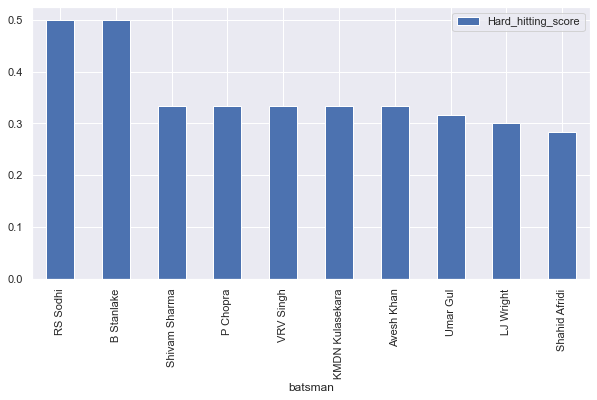

In [163]:
HH_batsman_df_top_10.plot(x="batsman", y="Hard_hitting_score", kind="bar")

The bar chart shows the batsmen ranging from the highest to the lowest hard hitting score.

In [164]:
#Hard hitters in a team
batsman_hh_grp_1 = df_2.groupby(['batsman','batting_team'])['batsman_runs'].agg(['count']).reset_index()
batsman_hh_grp_1.rename(columns ={'count':'Number_of_fours_and_sixes'}, inplace = True)
batsman_total_balls_grp_1 = ipl_df.groupby(['batsman'])['ball'].agg(['count']).reset_index()
batsman_total_balls_grp_1.rename(columns ={'count':'Number_of_balls_played'}, inplace = True)
HH_batsman_df_1=pd.merge(batsman_hh_grp_1,batsman_total_balls_grp_1,on='batsman')
HH_batsman_df_1['Hard_hitting_score_team']=HH_batsman_df_1['Number_of_fours_and_sixes']/HH_batsman_df_1['Number_of_balls_played']
HH_batsman_df_1.sort_values(by=['Hard_hitting_score_team'], ascending=False)

batsman            batting_team  Number_of_fours_and_sixes  \
594         RS Sodhi         Kings XI Punjab                          1   
113       B Stanlake     Sunrisers Hyderabad                          1   
738        VRV Singh         Kings XI Punjab                          1   
355  KMDN Kulasekara     Chennai Super Kings                          1   
101       Avesh Khan          Delhi Capitals                          1   
..               ...                     ...                        ...   
352        KM Jadhav    Kochi Tuskers Kerala                          1   
462    Mandeep Singh   Kolkata Knight Riders                          1   
532        Q de Kock     Sunrisers Hyderabad                          1   
55          AJ Finch        Rajasthan Royals                          1   
231     F du Plessis  Rising Pune Supergiant                          1   

     Number_of_balls_played  Hard_hitting_score_team  
594                       2                 0.500000  
113                       2                 0.500000  
738                       3                 0.333333  
355                       3                 0.333333  
101                       3                 0.333333  
..                      ...                      ...  
352                     947                 0.001056  
462                    1364                 0.000733  
532                    1499                 0.000667  
55                     1622                 0.000617  
231                    1828                 0.000547  

[773 rows x 5 columns]

In here, the data is being grouped by the Batsman and the batting team in order to find the players having the highest hard hitting ability in a particular team.

In [165]:
HH_batsman_df_1[(HH_batsman_df_1.batsman=='KM Jadhav')]

batsman                 batting_team  Number_of_fours_and_sixes  \
350  KM Jadhav          Chennai Super Kings                         32   
351  KM Jadhav             Delhi Daredevils                         65   
352  KM Jadhav         Kochi Tuskers Kerala                          1   
353  KM Jadhav  Royal Challengers Bangalore                         39   

     Number_of_balls_played  Hard_hitting_score_team  
350                     947                 0.033791  
351                     947                 0.068638  
352                     947                 0.001056  
353                     947                 0.041183

In [166]:
HH_per_team=HH_batsman_df_1[(HH_batsman_df_1.batting_team=='Chennai Super Kings')]
HH_per_team=HH_per_team.sort_values(by=['Hard_hitting_score_team'], ascending=False)
HH_per_team

batsman         batting_team  Number_of_fours_and_sixes  \
355  KMDN Kulasekara  Chennai Super Kings                          1   
628         S Vidyut  Chennai Super Kings                         24   
439        ML Hayden  Chennai Super Kings                        165   
660       SP Fleming  Chennai Super Kings                         30   
608      S Badrinath  Chennai Super Kings                        182   
645         SK Raina  Chennai Super Kings                        583   
285        JA Morkel  Chennai Super Kings                         99   
230     F du Plessis  Chennai Super Kings                        251   
417       MEK Hussey  Chennai Super Kings                        226   
455         MS Dhoni  Chennai Super Kings                        466   
606       S Anirudha  Chennai Super Kings                         16   
470     N Jagadeesan  Chennai Super Kings                          4   
573       RD Gaikwad  Chennai Super Kings                         22   
4         A Flintoff  Chennai Super Kings                          7   
429       MJ Santner  Chennai Super Kings                          3   
650        SM Curran  Chennai Super Kings                         24   
656        SN Thakur  Chennai Super Kings                          5   
396          M Ntini  Chennai Super Kings                          2   
197        DL Chahar  Chennai Super Kings                          6   
634        SB Jakati  Chennai Super Kings                          3   
295         JDP Oram  Chennai Super Kings                         11   
319  Joginder Sharma  Chennai Super Kings                          3   
398          M Vijay  Chennai Super Kings                        218   
183         DJ Bravo  Chennai Super Kings                        111   
458          MS Gony  Chennai Super Kings                          7   
181     DE Bollinger  Chennai Super Kings                          2   
208         DR Smith  Chennai Super Kings                        152   
307          JM Kemp  Chennai Super Kings                          2   
565        RA Jadeja  Chennai Super Kings                        120   
672        SR Watson  Chennai Super Kings                        187   
118      BB McCullum  Chennai Super Kings                        125   
272      Imran Tahir  Chennai Super Kings                          2   
89         AT Rayudu  Chennai Super Kings                        156   
533         R Ashwin  Chennai Super Kings                         20   
688      SW Billings  Chennai Super Kings                         13   
207        DR Shorey  Chennai Super Kings                          1   
500           P Negi  Chennai Super Kings                         15   
366         L Balaji  Chennai Super Kings                          2   
350        KM Jadhav  Chennai Super Kings                         32   
395   M Muralitharan  Chennai Super Kings                          1   
506         PA Patel  Chennai Super Kings                         74   
442        MM Sharma  Chennai Super Kings                          3   
241        GJ Bailey  Chennai Super Kings                          9   
190        DJ Hussey  Chennai Super Kings                         14   
746          WP Saha  Chennai Super Kings                         16   
389         M Manhas  Chennai Super Kings                          4   
635        SB Styris  Chennai Super Kings                          1   
258  Harbhajan Singh  Chennai Super Kings                          4   

     Number_of_balls_played  Hard_hitting_score_team  
355                       3                 0.333333  
628                     115                 0.208696  
439                     838                 0.196897  
660                     171                 0.175439  
608                    1245                 0.146185  
645                    4041                 0.144271  
285                     711                 0.139241  
230                    1828                 

The data is filtered based on a particular batting team ( Chennai Super Kings ) and the list above shows the hard hitters in that team.

In [167]:
#over the last 3 years which team has more hard_hitters 2018 to 2020
past_3_years=ipl_df[(ipl_df.Season > 2018)]
df_3=past_3_years[(past_3_years.batsman_runs == 4)|(past_3_years.batsman_runs == 6)]
#Hard hitters in a team
batsman_hh_grp_2 = df_3.groupby(['batsman','batting_team'])['batsman_runs'].agg(['count']).reset_index()
batsman_hh_grp_2.rename(columns ={'count':'Number_of_fours_and_sixes'}, inplace = True)
batsman_total_balls_grp_2 = past_3_years.groupby(['batsman'])['ball'].agg(['count']).reset_index()
batsman_total_balls_grp_2.rename(columns ={'count':'Number_of_balls_played'}, inplace = True)
HH_batsman_df_2=pd.merge(batsman_hh_grp_2,batsman_total_balls_grp_2,on='batsman')
HH_batsman_df_2['Hard_hitting_score_team_past_3_years']=HH_batsman_df_2['Number_of_fours_and_sixes']/HH_batsman_df_2['Number_of_balls_played']
HH_batsman_df_2=HH_batsman_df_2.sort_values(by=['Hard_hitting_score_team_past_3_years'], ascending=False)

In here, the last 3 season data (2018-2020) is taken into account for finding teams having the highest hard hitting players.  

In [168]:
past_3_years_hh_avg=HH_batsman_df_2.groupby(['batting_team'])['Hard_hitting_score_team_past_3_years'].mean().reset_index()
past_3_years_hh_avg=past_3_years_hh_avg.sort_values(by=['Hard_hitting_score_team_past_3_years'], ascending=False)
past_3_years_hh_avg

batting_team  Hard_hitting_score_team_past_3_years
4               Mumbai Indians                              0.169264
1               Delhi Capitals                              0.154482
3        Kolkata Knight Riders                              0.147446
5             Rajasthan Royals                              0.142069
7          Sunrisers Hyderabad                              0.138581
0          Chennai Super Kings                              0.132508
2              Kings XI Punjab                              0.126733
6  Royal Challengers Bangalore                              0.125743

<AxesSubplot:xlabel='batting_team'>

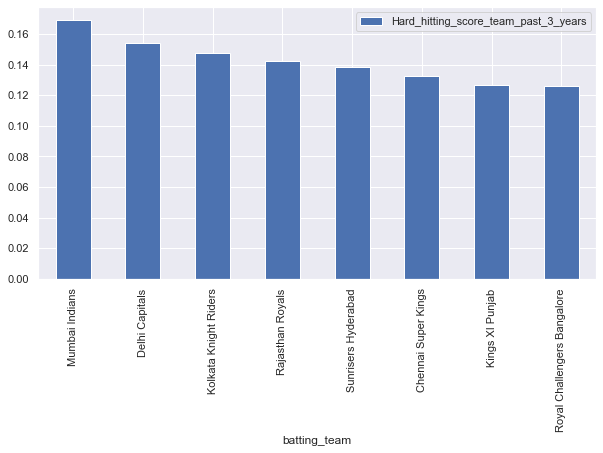

In [169]:
#Team having the highest hard-hitting batsmen average over the past 3 years.
past_3_years_hh_avg.plot(x="batting_team", y="Hard_hitting_score_team_past_3_years", kind="bar")

The bar chart gives the data of the teams having the highest hard hitting players. The team Mumbai Indians topped the list followed by Delhi Capitals and Kolkata Knight Riders.

## Player consistency

In [170]:
#Player consistency
total_runs_df=ipl_df.groupby(['batsman'])['total_runs'].agg('sum').reset_index()
total_runs_df=total_runs_df.sort_values(by=['total_runs'], ascending=False)
total_runs_df

batsman  total_runs
505         V Kohli        6081
438        SK Raina        5604
116       DA Warner        5522
407        S Dhawan        5452
379       RG Sharma        5394
..              ...         ...
387      RR Bhatkal           0
91          C Nanda           0
413    S Lamichhane           0
506  V Pratap Singh           0
228        KK Ahmed           0

[537 rows x 2 columns]

The ipl_df dataframe is grouped by the batsman and the total runs scored by each batsman is calculated and is arranged from highest to the lowest run scorer.

In [171]:
ipl_df['is_wicket'] = ipl_df['is_wicket'].astype('int64')

In [172]:
out_times_df=ipl_df.groupby(['batsman'])['is_wicket'].sum().reset_index()
out_times_df=out_times_df.sort_values(by=['is_wicket'], ascending=False)
out_times_df

batsman  is_wicket
379         RG Sharma        177
398        RV Uthappa        169
505           V Kohli        163
438          SK Raina        160
225        KD Karthik        152
..                ...        ...
175        I Malhotra          0
337    P Parameswaran          0
173     Harpreet Brar          0
306  Mashrafe Mortaza          0
339            P Sahu          0

[537 rows x 2 columns]

The ipl_df dataframe is grouped by the batsman and the total number of times the batsman was OUT is calculated. 

In [173]:
ipl_df[(ipl_df.id==335986) & (ipl_df.batsman=='RG Sharma')]

id     city        date player_of_match         venue  \
1070  335986  Kolkata  2008-04-20       DJ Hussey  Eden Gardens   
1071  335986  Kolkata  2008-04-20       DJ Hussey  Eden Gardens   
1072  335986  Kolkata  2008-04-20       DJ Hussey  Eden Gardens   

                      team1            team2      toss_winner toss_decision  \
1070  Kolkata Knight Riders  Deccan Chargers  Deccan Chargers           bat   
1071  Kolkata Knight Riders  Deccan Chargers  Deccan Chargers           bat   
1072  Kolkata Knight Riders  Deccan Chargers  Deccan Chargers           bat   

                     winner  ... batsman_runs  extra_runs total_runs  \
1070  Kolkata Knight Riders  ...            0           0          0   
1071  Kolkata Knight Riders  ...            0           0          0   
1072  Kolkata Knight Riders  ...            0           0          0   

     non_boundary is_wicket  fielder  extras_type     batting_team  \
1070            0         0      NaN          NaN  Deccan Chargers   
1071            0         0      NaN          NaN  Deccan Chargers   
1072            0         1  WP Saha          NaN  Deccan Chargers   

               bowling_team Season  
1070  Kolkata Knight Riders   2008  
1071  Kolkata Knight Riders   2008  
1072  Kolkata Knight Riders   2008  

[3 rows x 31 columns]

In [174]:
i=ipl_df[(ipl_df.batsman=='RG Sharma')]
i.id.nunique()

194

In [175]:
PC_df=pd.merge(total_runs_df,out_times_df,on='batsman')
PC_df

batsman  total_runs  is_wicket
0           V Kohli        6081        163
1          SK Raina        5604        160
2         DA Warner        5522        126
3          S Dhawan        5452        152
4         RG Sharma        5394        177
..              ...         ...        ...
532      RR Bhatkal           0          2
533         C Nanda           0          1
534    S Lamichhane           0          1
535  V Pratap Singh           0          1
536        KK Ahmed           0          2

[537 rows x 3 columns]

The dataframes "total_runs_df"(containing the total runs scored by each batsman) and "out_times_df"(containing the number of times out) is merged on the common column Batsman.

In [176]:
PC_df['Player consistency']=PC_df['total_runs']/PC_df['is_wicket']
#drop NAN and infinity values for players who havent taken a wicket
PC_df.replace([np.inf, -np.inf], np.nan, inplace=True)
PC_df.dropna(inplace=True)
PC_df=PC_df.sort_values(by=['Player consistency'], ascending=False)
PC_df

batsman  total_runs  is_wicket  Player consistency
250   Iqbal Abdulla          97          1           97.000000
164      RD Gaikwad         220          3           73.333333
190      MN van Wyk         175          3           58.333333
167  PD Collingwood         213          4           53.250000
101         HM Amla         600         13           46.153846
..              ...         ...        ...                 ...
532      RR Bhatkal           0          2            0.000000
533         C Nanda           0          1            0.000000
534    S Lamichhane           0          1            0.000000
535  V Pratap Singh           0          1            0.000000
536        KK Ahmed           0          2            0.000000

[502 rows x 4 columns]

Player Consistency - This metric is calculated using the total runs scored by the player divided by Number of times the player got out. Since some of the batsmen never got out due to playing in very few matches, it resulted in infinity values which are replaced by the nan values and are dropped from the data. This data is then sorted in descending order showing the top players who are being consistent.

<AxesSubplot:xlabel='batsman'>

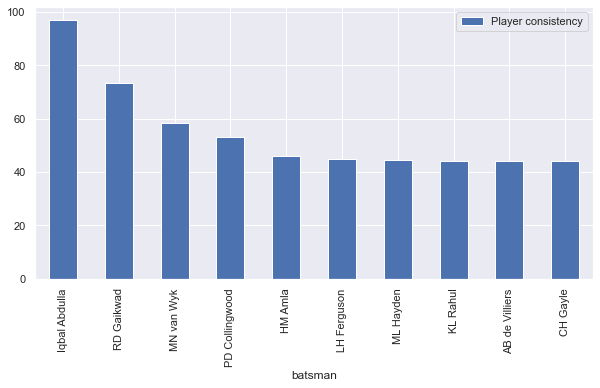

In [177]:
Player_consistency_top_10=PC_df.head(10)
Player_consistency_top_10.plot(x="batsman", y="Player consistency", kind="bar")

The bar chart shows the players with the highest consistency.

## Wicket taking ability

In [178]:
#Wicket taking ability
total_balls_bowled=ipl_df.groupby(['bowler'])['ball'].count().reset_index()
total_balls_bowled=total_balls_bowled.sort_values(by=['ball'], ascending=False)
total_balls_bowled

bowler  ball
133  Harbhajan Singh  3451
281         R Ashwin  3327
276        PP Chawla  3285
6           A Mishra  3233
350       SL Malinga  2974
..               ...   ...
210   LS Livingstone     6
95         DA Warner     2
359        SPD Smith     2
356          SN Khan     2
22      AC Gilchrist     1

[420 rows x 2 columns]

The dataframe ipl_df is grouped based on the bowlers and the number of balls bowled by each bowler is calculated and sorted.

## Max balls bowled bowlers

<AxesSubplot:xlabel='bowler'>

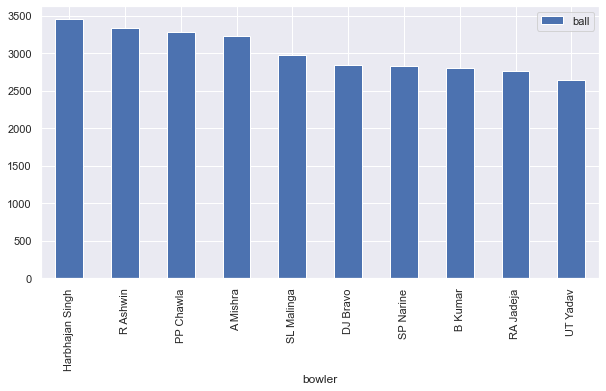

In [179]:
#Max balls bowled bowlers
total_balls_bowled=total_balls_bowled.sort_values(by=['ball'], ascending=False)
total_balls_bowled_10=total_balls_bowled.head(10)
total_balls_bowled_10.plot(x="bowler", y="ball", kind="bar")

The bar chart represents the bowlers who had bowled the highest number of balls in all these IPL seasons. Harbhajan Singh has topped the list followed by Ravichander ashwin and Piyush Chawla.

In [180]:
total_wickets_taken=ipl_df.groupby(['bowler'])['is_wicket'].sum().reset_index()
total_wickets_taken=total_wickets_taken.sort_values(by=['is_wicket'], ascending=False)
total_wickets_taken

bowler  is_wicket
350       SL Malinga        188
99          DJ Bravo        175
6           A Mishra        169
276        PP Chawla        164
133  Harbhajan Singh        161
..               ...        ...
305          RR Bose          0
304       RR Bhatkal          0
295      RA Tripathi          0
294        RA Shaikh          0
210   LS Livingstone          0

[420 rows x 2 columns]

In here, the data is grouped by the Bowlers and the total number of wickets taken by each of them is calculated and sorted.

<AxesSubplot:xlabel='bowler'>

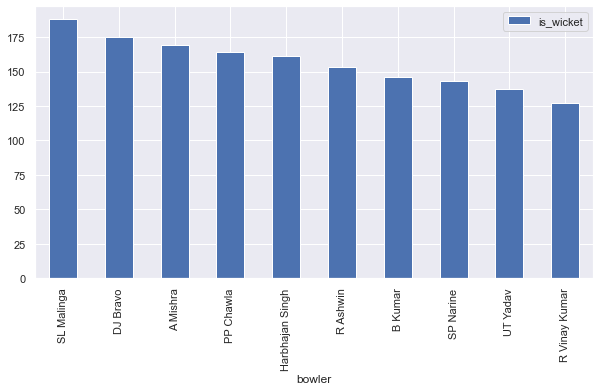

In [181]:
total_wickets_taken_10=total_wickets_taken.head(10)
total_wickets_taken_10.plot(x="bowler", y="is_wicket", kind="bar")

The bar chart shows the bowlers who had taken the highest number of wickets so far. Lasith Malinga tops the list followed by DJ Bravo and Amit Mishra.

In [182]:
WTA_df=pd.merge(total_balls_bowled,total_wickets_taken,on='bowler')
WTA_df

bowler  ball  is_wicket
0    Harbhajan Singh  3451        161
1           R Ashwin  3327        153
2          PP Chawla  3285        164
3           A Mishra  3233        169
4         SL Malinga  2974        188
..               ...   ...        ...
415       P Prasanth     6          0
416        DA Warner     2          0
417        SPD Smith     2          0
418          SN Khan     2          0
419     AC Gilchrist     1          1

[420 rows x 3 columns]

The dataframes "total_balls_bowled" and "total_wickets_taken" are merged on the common feature "bowler".

In [183]:
WTA_df['Wicket_taking_ability']=WTA_df['ball']/WTA_df['is_wicket']
WTA_df

bowler  ball  is_wicket  Wicket_taking_ability
0    Harbhajan Singh  3451        161              21.434783
1           R Ashwin  3327        153              21.745098
2          PP Chawla  3285        164              20.030488
3           A Mishra  3233        169              19.130178
4         SL Malinga  2974        188              15.819149
..               ...   ...        ...                    ...
415       P Prasanth     6          0                    inf
416        DA Warner     2          0                    inf
417        SPD Smith     2          0                    inf
418          SN Khan     2          0                    inf
419     AC Gilchrist     1          1               1.000000

[420 rows x 4 columns]

<AxesSubplot:xlabel='bowler'>

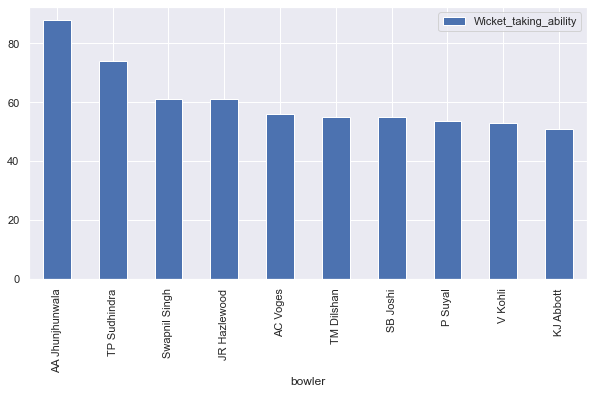

In [184]:
WTA_df.replace([np.inf, -np.inf], np.nan, inplace=True)
WTA_df.dropna(inplace=True)
WTA_df=WTA_df.sort_values(by=['Wicket_taking_ability'], ascending=False)
wickets_taken_10=WTA_df.head(10)
wickets_taken_10.plot(x="bowler", y="Wicket_taking_ability", kind="bar")

Wicket_taking_ability - This metric is calculated as : Total number of balls bowled divided by the total number of wickets taken by the player. Since some of bowlers had never taken a wicket as they had very few appearances in the matches lead to the infinity values. These values are handled by replacing them with the nan values and eventually dropping them from the data. The bar chart represents the top bowlers with the highest wicket taking ability.

## Strike-rate

<AxesSubplot:xlabel='batsman'>

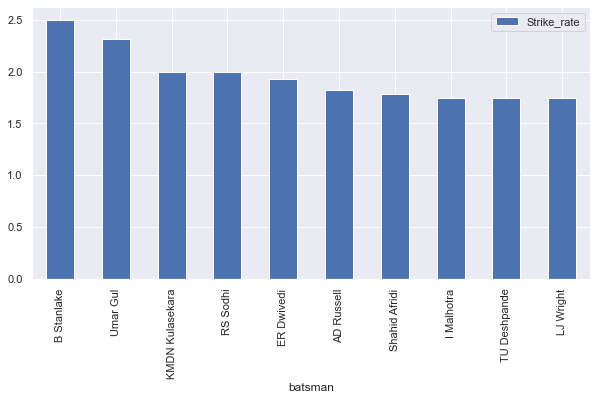

In [185]:
#Strike-rate Strike Rate
SR_batsman_df_1=pd.merge(total_runs_df,batsman_total_balls_grp,on='batsman')
SR_batsman_df_1['Strike_rate']=SR_batsman_df_1['total_runs']/SR_batsman_df_1['Number_of_balls_played']
SR_batsman_df_1=SR_batsman_df_1.sort_values(by=['Strike_rate'], ascending=False)
SR_batsman_df_2=SR_batsman_df_1.head(10)
SR_batsman_df_2.plot(x="batsman", y="Strike_rate", kind="bar")

In here, the dataframes "total_runs_df" (containing the total number of runs scored by the batsman) and "batsman_total_balls_grp"(containing the total number of balls faced by the batsman) are merged on "batsman". 
Strike rate of the batsman is calculated as follows: Total number of runs scored / Total number of balls faced. The bar chart represents batsmen with the highest strike rates.

## Bowling metrics
### Economy: Run scored / (No. of ball bowled by bowler / 6

In [186]:
#Bowling metrics
#Economy: Run scored / (No. of ball bowled by bowler / 6
total_runs_bat_bowl_df=ipl_df.groupby(['bowler'])['total_runs'].agg('sum').reset_index()
total_runs_bat_bowl_df

bowler  total_runs
0    A Ashish Reddy         400
1        A Chandila         245
2       A Choudhary         144
3       A Dananjaya          47
4        A Flintoff         106
..              ...         ...
415      YA Abdulla         311
416       YK Pathan        1443
417       YS Chahal        2782
418    Yuvraj Singh        1091
419          Z Khan        2860

[420 rows x 2 columns]

The data is grouped by the "bowler" and the number of runs conceded by each bowler is calculated.

In [99]:
Economy_bowler=pd.merge(total_runs_bat_bowl_df,total_balls_bowled,on='bowler')
Economy_bowler['Economy']=Economy_bowler['total_runs']/Economy_bowler['ball']/6
Economy_bowler=Economy_bowler.sort_values(by=['Economy'], ascending=False)
Economy_bowler

bowler  total_runs  ball   Economy
137    I Malhotra          23     6  0.638889
207     LPC Silva          21     6  0.583333
55       B Chipli          20     6  0.555556
356       SN Khan           6     2  0.500000
267    P Prasanth          18     6  0.500000
..            ...         ...   ...       ...
34      AM Rahane           5     6  0.138889
369   Sachin Baby           8    10  0.133333
42         AS Roy          11    15  0.122222
254      NB Singh          18    25  0.120000
22   AC Gilchrist           0     1  0.000000

[420 rows x 4 columns]

Economy of the Bowler: Number of runs conceded by the bowler / Number of balls bowled. The lesser the metric is, the better the bowler is performing. The two data frames "total_runs_bat_bowl_df"(runs conceded) and "total_balls_bowled" (no. of balls bowled by the bowler) are merged on "bowler" and the economy is calculated.

<AxesSubplot:xlabel='bowler'>

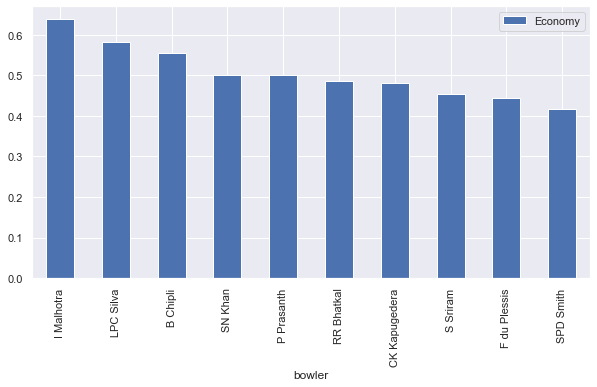

In [187]:
Economy_bowler_1=Economy_bowler.head(10)
Economy_bowler_1.plot(x="bowler", y="Economy", kind="bar")

The bar chart reperents the top bowlers with the highest economy.

## Bowler Consistency

In [188]:
#Bowler Consistency
Consistency_bowler=pd.merge(total_runs_bat_bowl_df,total_wickets_taken,on='bowler')
Consistency_bowler['Bowler_consistency']=Consistency_bowler['total_runs']/Consistency_bowler['is_wicket']
Consistency_bowler=Consistency_bowler.sort_values(by=['Bowler_consistency'], ascending=False)
Consistency_bowler

bowler  total_runs  is_wicket  Bowler_consistency
210  LS Livingstone          13          0                 inf
213        M Manhas          42          0                 inf
207       LPC Silva          21          0                 inf
192   KS Williamson          31          0                 inf
180       KAJ Roach          80          0                 inf
..              ...         ...        ...                 ...
202   LA Carseldine           6          1            6.000000
364       SS Mundhe           6          1            6.000000
34        AM Rahane           5          1            5.000000
369     Sachin Baby           8          3            2.666667
22     AC Gilchrist           0          1            0.000000

[420 rows x 4 columns]

The dataframes "total_runs_bat_bowl_df"(runs conceded) and "total_wickets_taken"(number of wickets taken) are merged on bowler. Then, the bowler consistency is calculated.

<AxesSubplot:xlabel='bowler'>

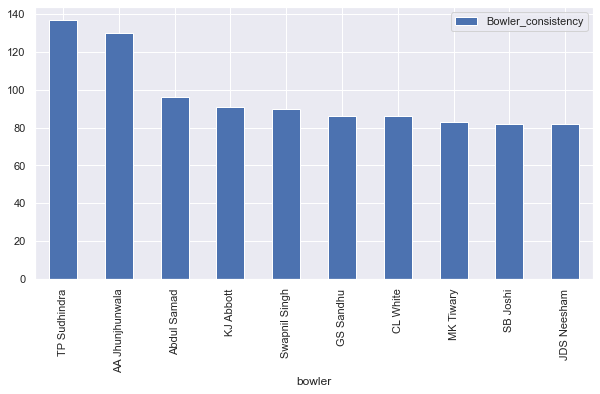

In [189]:
Consistency_bowler.replace([np.inf, -np.inf], np.nan, inplace=True)
Consistency_bowler.dropna(inplace=True)
Consistency_bowler=Consistency_bowler.sort_values(by=['Bowler_consistency'], ascending=False)
Consistency_bowler_top_10=Consistency_bowler.head(10)
Consistency_bowler_top_10.plot(x="bowler", y="Bowler_consistency", kind="bar")

The metric Bowler consistency is calculated as follows: Total runs conceded by the player / Number of wickets taken. The infinity values are handled by replacing with nan values and then dropped from the data. The bar chart here represents the bowlers with the highest consistency.

    

In [190]:
Bowler_performance=pd.merge(Consistency_bowler,Economy_bowler,on='bowler')

The dataframes "Consistency_bowler","Economy_bowler" and "WTA_df"(wicket takeing ability) are merged on bowler in order to calculate the overall bowler performances.

In [191]:
Bowler_performance=pd.merge(Bowler_performance,WTA_df,on='bowler')
Bowler_performance

bowler  total_runs_x  is_wicket_x  Bowler_consistency  \
0       TP Sudhindra           137            1          137.000000   
1    AA Jhunjhunwala           130            1          130.000000   
2        Abdul Samad            96            1           96.000000   
3          KJ Abbott           182            2           91.000000   
4      Swapnil Singh            90            1           90.000000   
..               ...           ...          ...                 ...   
359    LA Carseldine             6            1            6.000000   
360        SS Mundhe             6            1            6.000000   
361        AM Rahane             5            1            5.000000   
362      Sachin Baby             8            3            2.666667   
363     AC Gilchrist             0            1            0.000000   

     total_runs_y  ball_x   Economy  ball_y  is_wicket_y  \
0             137      74  0.308559      74            1   
1             130      88  0.246212      88            1   
2              96      43  0.372093      43            1   
3             182     102  0.297386     102            2   
4              90      61  0.245902      61            1   
..            ...     ...       ...     ...          ...   
359             6       7  0.142857       7            1   
360             6       7  0.142857       7            1   
361             5       6  0.138889       6            1   
362             8      10  0.133333      10            3   
363             0       1  0.000000       1            1   

     Wicket_taking_ability  
0                74.000000  
1                88.000000  
2                43.000000  
3                51.000000  
4                61.000000  
..                     ...  
359               7.000000  
360               7.000000  
361               6.000000  
362               3.333333  
363               1.000000  

[364 rows x 10 columns]

In [192]:
Bowler_performance.drop(['total_runs_y','ball_y', 'is_wicket_y'], axis=1, inplace=True)
Bowler_performance

bowler  total_runs_x  is_wicket_x  Bowler_consistency  ball_x  \
0       TP Sudhindra           137            1          137.000000      74   
1    AA Jhunjhunwala           130            1          130.000000      88   
2        Abdul Samad            96            1           96.000000      43   
3          KJ Abbott           182            2           91.000000     102   
4      Swapnil Singh            90            1           90.000000      61   
..               ...           ...          ...                 ...     ...   
359    LA Carseldine             6            1            6.000000       7   
360        SS Mundhe             6            1            6.000000       7   
361        AM Rahane             5            1            5.000000       6   
362      Sachin Baby             8            3            2.666667      10   
363     AC Gilchrist             0            1            0.000000       1   

      Economy  Wicket_taking_ability  
0    0.308559              74.000000  
1    0.246212              88.000000  
2    0.372093              43.000000  
3    0.297386              51.000000  
4    0.245902              61.000000  
..        ...                    ...  
359  0.142857               7.000000  
360  0.142857               7.000000  
361  0.138889               6.000000  
362  0.133333               3.333333  
363  0.000000               1.000000  

[364 rows x 7 columns]

Some of the columns are being dropped due to repetition.

<AxesSubplot:>

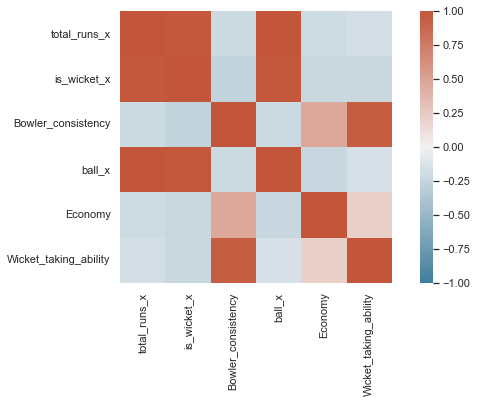

In [193]:
corr_bowler=Bowler_performance.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_bowler, square=True, vmin=-1, vmax=1, cmap=cmap)

The correlation is calculated and represented in the heatmap. The bowler consistency is positively correlated with the wicket taking ability and the Economy of the bowler. 

In [194]:
Batsman_performance=pd.merge(SR_batsman_df_1,PC_df,on='batsman')
Batsman_performance

batsman  total_runs_x  Number_of_balls_played  Strike_rate  \
0         Umar Gul            44                      19     2.315789   
1       ER Dwivedi            29                      15     1.933333   
2       AD Russell          1604                     882     1.818594   
3    Shahid Afridi            82                      46     1.782609   
4     TU Deshpande            21                      12     1.750000   
..             ...           ...                     ...          ...   
497       ND Doshi             0                      13     0.000000   
498      IC Pandey             0                       2     0.000000   
499    SS Cottrell             0                       2     0.000000   
500       JL Denly             0                       1     0.000000   
501       KK Ahmed             0                       3     0.000000   

     total_runs_y  is_wicket  Player consistency  
0              44          3           14.666667  
1              29          2           14.500000  
2            1604         50           32.080000  
3              82          8           10.250000  
4              21          1           21.000000  
..            ...        ...                 ...  
497             0          1            0.000000  
498             0          1            0.000000  
499             0          1            0.000000  
500             0          1            0.000000  
501             0          2            0.000000  

[502 rows x 7 columns]

In [195]:
Batsman_performance=pd.merge(Batsman_performance,HH_batsman_df,on='batsman')
Batsman_performance

batsman  total_runs_x  Number_of_balls_played_x  Strike_rate  \
0         Umar Gul            44                        19     2.315789   
1       ER Dwivedi            29                        15     1.933333   
2       AD Russell          1604                       882     1.818594   
3    Shahid Afridi            82                        46     1.782609   
4     TU Deshpande            21                        12     1.750000   
..             ...           ...                       ...          ...   
420       AB Dinda            30                        50     0.600000   
421        T Kohli            12                        20     0.600000   
422   Ravi Bishnoi             7                        12     0.583333   
423       S Nadeem            46                        87     0.528736   
424       PV Tambe            20                        39     0.512821   

     total_runs_y  is_wicket  Player consistency  Number_of_fours_and_sixes  \
0              44          3           14.666667                          6   
1              29          2           14.500000                          4   
2            1604         50           32.080000                        234   
3              82          8           10.250000                         13   
4              21          1           21.000000                          3   
..            ...        ...                 ...                        ...   
420            30          9            3.333333                          2   
421            12          3            4.000000                          1   
422             7          1            7.000000                          1   
423            46         15            3.066667                          2   
424            20          1           20.000000                          1   

     Number_of_balls_played_y  Hard_hitting_score  
0                          19            0.315789  
1                          15            0.266667  
2                         882            0.265306  
3                          46            0.282609  
4                          12            0.250000  
..                        ...                 ...  
420                        50            0.040000  
421                        20            0.050000  
422                        12            0.083333  
423                        87            0.022989  
424                        39            0.025641  

[425 rows x 10 columns]

The dataframes containing the "strike rate","player consistency","total runs scored" and "hard hitters" are merged together on "batsman" in order to get the overall performances of the batsman.

In [196]:
Batsman_performance.drop(['total_runs_y','Number_of_balls_played_y','Number_of_fours_and_sixes'], axis=1, inplace=True)
Batsman_performance

batsman  total_runs_x  Number_of_balls_played_x  Strike_rate  \
0         Umar Gul            44                        19     2.315789   
1       ER Dwivedi            29                        15     1.933333   
2       AD Russell          1604                       882     1.818594   
3    Shahid Afridi            82                        46     1.782609   
4     TU Deshpande            21                        12     1.750000   
..             ...           ...                       ...          ...   
420       AB Dinda            30                        50     0.600000   
421        T Kohli            12                        20     0.600000   
422   Ravi Bishnoi             7                        12     0.583333   
423       S Nadeem            46                        87     0.528736   
424       PV Tambe            20                        39     0.512821   

     is_wicket  Player consistency  Hard_hitting_score  
0            3           14.666667            0.315789  
1            2           14.500000            0.266667  
2           50           32.080000            0.265306  
3            8           10.250000            0.282609  
4            1           21.000000            0.250000  
..         ...                 ...                 ...  
420          9            3.333333            0.040000  
421          3            4.000000            0.050000  
422          1            7.000000            0.083333  
423         15            3.066667            0.022989  
424          1           20.000000            0.025641  

[425 rows x 7 columns]

The repetitive columns are dropped.

<AxesSubplot:>

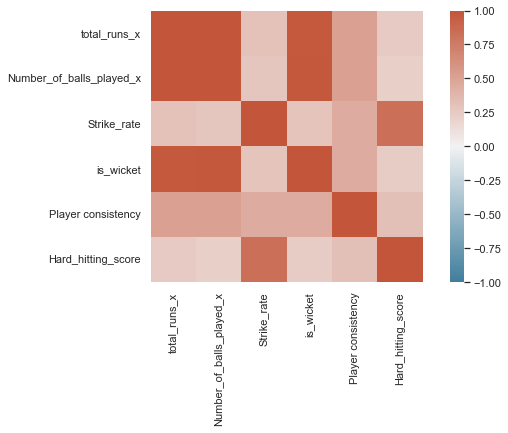

In [197]:
corr_batsman=Batsman_performance.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_batsman, square=True, vmin=-1, vmax=1, cmap=cmap)

The correlation between the different metrics of the batsman are calculated and represented in a heatmap. The total runs scored by the batsman is positively correlated with the no. of balls played and the player consistency. The strike rate and the hard_hitting ability of the batsman are positively correlated.

In [198]:
#weighted factor method to calculate overall performance
#Subjective weightage we have assumed values based on inituition
"""total_run	0.2
   balls_played	0.2
   strike rate	0.2
   is wicket	0.1
   player consistency	0.1
   hard hit score	0.2
"""

'total_run\t0.2\n   balls_played\t0.2\n   strike rate\t0.2\n   is wicket\t0.1\n   player consistency\t0.1\n   hard hit score\t0.2\n'

The above are the subjective weights assumed based on the domain knowledge.

While calculating the different metrics, some of the cases where the players participation is less, it might mislead the final decision on the top scores. For example, an amateur player would score higher in the strike rate ignoring the fact that the player has very less experience. We can overcome this by using the Weighted factor method in which we mutiply the factors by its repesctive weights in order to reflect the importance to the final decision.

## Batsman Performance calculation

In [199]:
#Batsman Performance calculation
Batsman_performance['Overall_performance']=(0.2*Batsman_performance['total_runs_x']+ 0.2*Batsman_performance['Number_of_balls_played_x']+
0.2*Batsman_performance['Strike_rate']+ 0.1*Batsman_performance['is_wicket']+0.1*Batsman_performance['Player consistency']+
0.2*Batsman_performance['Hard_hitting_score'])

Batsman_performance

batsman  total_runs_x  Number_of_balls_played_x  Strike_rate  \
0         Umar Gul            44                        19     2.315789   
1       ER Dwivedi            29                        15     1.933333   
2       AD Russell          1604                       882     1.818594   
3    Shahid Afridi            82                        46     1.782609   
4     TU Deshpande            21                        12     1.750000   
..             ...           ...                       ...          ...   
420       AB Dinda            30                        50     0.600000   
421        T Kohli            12                        20     0.600000   
422   Ravi Bishnoi             7                        12     0.583333   
423       S Nadeem            46                        87     0.528736   
424       PV Tambe            20                        39     0.512821   

     is_wicket  Player consistency  Hard_hitting_score  Overall_performance  
0            3           14.666667            0.315789            14.892982  
1            2           14.500000            0.266667            10.890000  
2           50           32.080000            0.265306           505.824780  
3            8           10.250000            0.282609            27.838043  
4            1           21.000000            0.250000             9.200000  
..         ...                 ...                 ...                  ...  
420          9            3.333333            0.040000            17.361333  
421          3            4.000000            0.050000             7.230000  
422          1            7.000000            0.083333             4.733333  
423         15            3.066667            0.022989            28.517011  
424          1           20.000000            0.025641            14.007692  

[425 rows x 8 columns]

The overall Batsman performance is calculated using the weighted factor method.

## best performing batsman

In [200]:
#best performing batsman
Batsman_performance=Batsman_performance.sort_values(by=['Overall_performance'], ascending=False)
Batsman_performance

batsman  total_runs_x  Number_of_balls_played_x  Strike_rate  \
124        V Kohli          6081                      4609     1.319375   
146       S Dhawan          5452                      4208     1.295627   
79        SK Raina          5604                      4041     1.386785   
123      RG Sharma          5394                      4088     1.319472   
47       DA Warner          5522                      3819     1.445928   
..             ...           ...                       ...          ...   
376       AN Ghosh             7                         8     0.875000   
418        A Zampa             5                         8     0.625000   
13       VRV Singh             5                         3     1.666667   
14   Shivam Sharma             5                         3     1.666667   
397     GD McGrath             4                         5     0.800000   

     is_wicket  Player consistency  Hard_hitting_score  Overall_performance  
124        163           37.306748            0.153179          2158.325186  
146        152           35.868421            0.166350          1951.079238  
79         160           35.025000            0.170007          1948.813859  
123        177           30.474576            0.164384          1917.444229  
47         126           43.825397            0.184603          1885.508646  
..         ...                 ...                 ...                  ...  
376          2            3.500000            0.125000             3.750000  
418          2            2.500000            0.125000             3.200000  
13           1            5.000000            0.333333             2.600000  
14           1            5.000000            0.333333             2.600000  
397          1            4.000000            0.200000             2.500000  

[425 rows x 8 columns]

Based on the overall performances, the data is sorted showing the best performing batsmen. 

## Top 10 Batsman

<AxesSubplot:xlabel='batsman'>

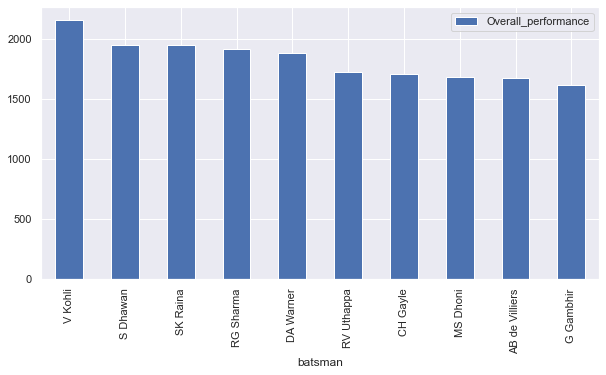

In [201]:
#Top 10 Batsman
Batsman_performance_top_10=Batsman_performance.head(10)
Batsman_performance_top_10.plot(x="batsman", y="Overall_performance", kind="bar")

The bar chart represents the best performing batsmen. Virat Kohli has topped the list followed by Shikhar Dawan, Suresh Raina and Rohit Sharma.

In [202]:
#weighted factor method to calculate overall performance
#Subjective weightage we have assumed values based on inituition
"""balls_played	0.2
   economy	0.2
   is wicket	0.2
   bowler consistency	0.2
   wicket taking ability	0.2
"""

'balls_played\t0.2\n   economy\t0.2\n   is wicket\t0.2\n   bowler consistency\t0.2\n   wicket taking ability\t0.2\n'

The above are the subjective weights assumed based on the domain knowledge.

## Bowler Performance calculation

In [203]:
#Bowler Performance calculation
Bowler_performance['Overall_performance']=( 0.2*Bowler_performance['ball_x']+
0.2*Bowler_performance['Economy']+ 0.2*Bowler_performance['is_wicket_x']+0.2*Bowler_performance['Bowler_consistency']+
0.2*Bowler_performance['Wicket_taking_ability'])

Bowler_performance

bowler  total_runs_x  is_wicket_x  Bowler_consistency  ball_x  \
0       TP Sudhindra           137            1          137.000000      74   
1    AA Jhunjhunwala           130            1          130.000000      88   
2        Abdul Samad            96            1           96.000000      43   
3          KJ Abbott           182            2           91.000000     102   
4      Swapnil Singh            90            1           90.000000      61   
..               ...           ...          ...                 ...     ...   
359    LA Carseldine             6            1            6.000000       7   
360        SS Mundhe             6            1            6.000000       7   
361        AM Rahane             5            1            5.000000       6   
362      Sachin Baby             8            3            2.666667      10   
363     AC Gilchrist             0            1            0.000000       1   

      Economy  Wicket_taking_ability  Overall_performance  
0    0.308559              74.000000            57.261712  
1    0.246212              88.000000            61.449242  
2    0.372093              43.000000            36.674419  
3    0.297386              51.000000            49.259477  
4    0.245902              61.000000            42.649180  
..        ...                    ...                  ...  
359  0.142857               7.000000             4.228571  
360  0.142857               7.000000             4.228571  
361  0.138889               6.000000             3.627778  
362  0.133333               3.333333             3.826667  
363  0.000000               1.000000             0.600000  

[364 rows x 8 columns]

The overall Bowler performance is similarly calculated using the weighted factor method.

## Top 10 Bowlers

<AxesSubplot:xlabel='bowler'>

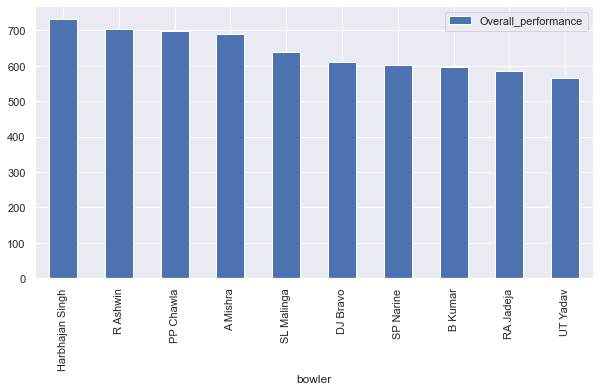

In [204]:
#Top 10 Bowlers
Bowler_performance=Bowler_performance.sort_values(by=['Overall_performance'], ascending=False)
Bowler_performance_top_10=Bowler_performance.head(10)
Bowler_performance_top_10.plot(x="bowler", y="Overall_performance", kind="bar")

Based on the overall performances, the data is sorted showing the best performing bowlers represented in the barchart. Harbhajan Singh is the best performing bowler followed by Ravichandran Ashwin, Piyush chawla, Amit Mishra and Lasith Malinga.

## City which hosted the max number of matches

Text(0.5, 1.0, 'IPL Matches hosted in various cities')

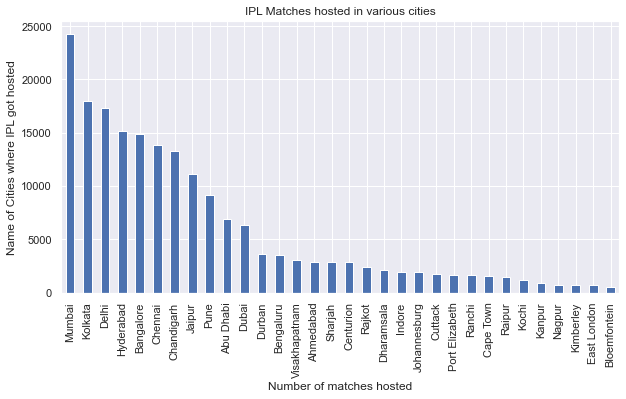

In [205]:
#City which hosted the max number of matches
plt.rcParams['figure.facecolor'] = '#00000000'
city_matches_hosted = ipl_df.city.value_counts()

city_matches_hosted.plot(kind = 'bar')
plt.xlabel("Number of matches hosted")
plt.ylabel("Name of Cities where IPL got hosted")
plt.title("IPL Matches hosted in various cities")

The bar chart represents the cities that has hosted the highest number of matches in all seasons (2008-2020). Mumbai has hosted the highest number of Ipl matches followed by Kolkata and Delhi.

## Which team played the maximum number of IPL Matches so far ?

In [206]:
#Which team played the maximum number of IPL Matches so far ?
Matches_played_1= ipl_df.team1.value_counts().reset_index()
Matches_played_1

index  team1
0   Royal Challengers Bangalore  25238
1                Mumbai Indians  23335
2           Chennai Super Kings  22740
3         Kolkata Knight Riders  22318
4               Kings XI Punjab  21805
5              Delhi Daredevils  19286
6              Rajasthan Royals  16679
7           Sunrisers Hyderabad  13879
8               Deccan Chargers   9448
9                 Pune Warriors   5483
10               Delhi Capitals   4629
11                Gujarat Lions   3771
12      Rising Pune Supergiants   1677
13       Rising Pune Supergiant   1617
14         Kochi Tuskers Kerala   1563

The number of matches played by the team as in the 1st innings of the game is stored in the Matches_played_1 dataframe.

In [207]:
Matches_played_2= ipl_df.team2.value_counts().reset_index()
Matches_played_2

index  team2
0                Mumbai Indians  25584
1               Kings XI Punjab  23274
2         Kolkata Knight Riders  22819
3              Rajasthan Royals  21375
4   Royal Challengers Bangalore  20492
5           Chennai Super Kings  19939
6              Delhi Daredevils  18213
7           Sunrisers Hyderabad  15650
8               Deccan Chargers   8625
9                 Pune Warriors   5417
10               Delhi Capitals   3391
11                Gujarat Lions   3327
12       Rising Pune Supergiant   2211
13         Kochi Tuskers Kerala   1633
14      Rising Pune Supergiants   1518

The number of matches played by the team as in the 2nd innings of the game is stored in the Matches_played_2 dataframe.

In [208]:
Team_total=pd.merge(Matches_played_1,Matches_played_2, on='index' )
Team_total['total_matches']=Team_total['team1']+ Team_total['team2']
Team_total

index  team1  team2  total_matches
0   Royal Challengers Bangalore  25238  20492          45730
1                Mumbai Indians  23335  25584          48919
2           Chennai Super Kings  22740  19939          42679
3         Kolkata Knight Riders  22318  22819          45137
4               Kings XI Punjab  21805  23274          45079
5              Delhi Daredevils  19286  18213          37499
6              Rajasthan Royals  16679  21375          38054
7           Sunrisers Hyderabad  13879  15650          29529
8               Deccan Chargers   9448   8625          18073
9                 Pune Warriors   5483   5417          10900
10               Delhi Capitals   4629   3391           8020
11                Gujarat Lions   3771   3327           7098
12      Rising Pune Supergiants   1677   1518           3195
13       Rising Pune Supergiant   1617   2211           3828
14         Kochi Tuskers Kerala   1563   1633           3196

The dataframes "Matches_played_1" and "Matches_played_2" are merged in order to find the Total number of matches played by each team and are sorted in descending order.

<AxesSubplot:xlabel='index'>

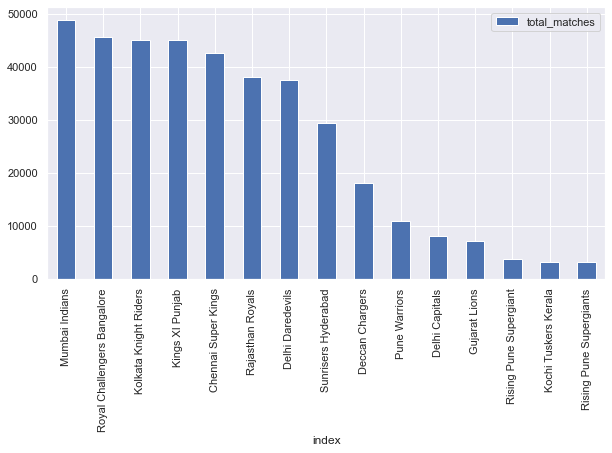

In [209]:
Team_total=Team_total.sort_values(by=['total_matches'], ascending=False)
Team_total.plot(x="index", y="total_matches", kind="bar")

The bar chart represents the teams which had played the highest number of matches. Mumbai Indians tops the list followed by Royal Challengers Banglore. Risisng Pune Super giants, Delhi Capitals and Gujarat Lions can be seen with a lower number of matches as they are new teams introduced recently. 

Text(0.5, 1.0, 'Matches Won - Batting First vs Bowling First')

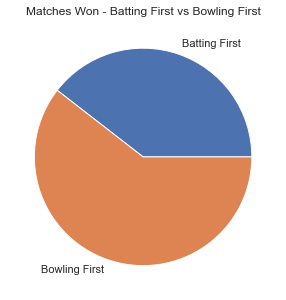

In [210]:
# Count the number of matches won by batting second 
matches_won_by_bowling_first =ipl_df[ipl_df.toss_decision == "field"].count()['winner']

# Count the number of matches won by batting first
matches_won_by_batting_first =ipl_df[ipl_df.toss_decision == "bat"].count()['winner']


plt.pie([matches_won_by_batting_first, matches_won_by_bowling_first], labels = ["Batting First", "Bowling First"])
plt.title("Matches Won - Batting First vs Bowling First")

In here, we are trying to compare the number of Matches won based on the decisions made by the team. The no.of matches won after deciding to field first and the no.of matches won after deciding to bat first are calculated. The pie chart indicates that Higher number of matches are won when the team chooses to Bowl first.

In [211]:
Bowl_first=ipl_df.toss_decision.value_counts().reset_index()
Bowl_first

index  toss_decision
0  field         117127
1    bat          76341

This split of data shows that most of the teams decide to Bowl/field first given that they win the toss.

In [212]:
ipl_df['toss_winner'].groupby(ipl_df['winner']).value_counts()

winner               toss_winner          
Chennai Super Kings  Chennai Super Kings      14703
                     Rajasthan Royals          2447
                     Kolkata Knight Riders     1356
                     Delhi Daredevils          1221
                     Mumbai Indians            1218
                                              ...  
Sunrisers Hyderabad  Delhi Daredevils           927
                     Rajasthan Royals           736
                     Delhi Capitals             490
                     Pune Warriors              476
                     Chennai Super Kings        475
Name: toss_winner, Length: 127, dtype: int64

In here, the no. of matches won by each team after being the toss winners is calculated.

## probability of winning based on toss decision

In [213]:
#probability of winning based on toss decision
wins_batting_first = ipl_df[ipl_df.toss_decision == "bat"].count()['winner']
probability_of_win_batting_first = wins_batting_first / ipl_df.count()['winner']
wins_batting_second =  ipl_df[ipl_df.toss_decision == "field"].count()['winner']
probability_of_win_batting_second = wins_batting_second / ipl_df.count()['winner']
print("Probability of winning a match by batting first - ", probability_of_win_batting_first)
print("Probability of winning a match by batting second - ", probability_of_win_batting_second)

Probability of winning a match by batting first -  0.39502630815760037
Probability of winning a match by batting second -  0.6049736918423997


Here, the no.of times the teams won the match by batting first and batting second are calculated respectively. The probabilities of winning a match by batting first and batting second are obtained by dividing the respective values by the total no of times the team has won. From the values obtained above, it evident that the teams which are batting second are more likely to win the game over the teams batting first.